<a href="https://colab.research.google.com/github/Eduu19982024/nse-stock-predictor/blob/main/for_10_lakhs_capital_10_days_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM, Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.callbacks import EarlyStopping
import random

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
#: Download data
nse_50_symbols = ['ADANIENT.NS','ADANIPORTS.NS','APOLLOHOSP.NS','ASIANPAINT.NS','AXISBANK.NS','BAJAJ-AUTO.NS','BAJAJFINSV.NS','BAJFINANCE.NS',
                  'BEL.NS','BHARTIARTL.NS','BPCL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DRREDDY.NS','EICHERMOT.NS','GRASIM.NS',
                  'HCLTECH.NS','HDFCBANK.NS','HDFCLIFE.NS','HEROMOTOCO.NS','HINDALCO.NS','HINDUNILVR.NS','ICICIBANK.NS','INFY.NS','INDUSINDBK.NS',
                  'ITC.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS','M&M.NS','MARUTI.NS','NESTLEIND.NS','NTPC.NS','ONGC.NS','POWERGRID.NS',
                  'RELIANCE.NS','SBILIFE.NS','SBIN.NS','SHRIRAMFIN.NS','SUNPHARMA.NS','TATACONSUM.NS','TATAMOTORS.NS','TATASTEEL.NS','TCS.NS',
                  'TECHM.NS','TITAN.NS','TRENT.NS','ULTRACEMCO.NS','WIPRO.NS']
start = '2017-11-17'
#end=datetime.now()

end = '2024-12-31'
data =  yf.download(nse_50_symbols, start=start, end=end, auto_adjust=True,threads=False)

selected_data =data[['Close']]

[*********************100%***********************]  50 of 50 completed


In [ ]:
list(data.columns)

[('Close', 'ADANIENT.NS'),
 ('Close', 'ADANIPORTS.NS'),
 ('Close', 'APOLLOHOSP.NS'),
 ('Close', 'ASIANPAINT.NS'),
 ('Close', 'AXISBANK.NS'),
 ('Close', 'BAJAJ-AUTO.NS'),
 ('Close', 'BAJAJFINSV.NS'),
 ('Close', 'BAJFINANCE.NS'),
 ('Close', 'BEL.NS'),
 ('Close', 'BHARTIARTL.NS'),
 ('Close', 'BPCL.NS'),
 ('Close', 'BRITANNIA.NS'),
 ('Close', 'CIPLA.NS'),
 ('Close', 'COALINDIA.NS'),
 ('Close', 'DRREDDY.NS'),
 ('Close', 'EICHERMOT.NS'),
 ('Close', 'GRASIM.NS'),
 ('Close', 'HCLTECH.NS'),
 ('Close', 'HDFCBANK.NS'),
 ('Close', 'HDFCLIFE.NS'),
 ('Close', 'HEROMOTOCO.NS'),
 ('Close', 'HINDALCO.NS'),
 ('Close', 'HINDUNILVR.NS'),
 ('Close', 'ICICIBANK.NS'),
 ('Close', 'INDUSINDBK.NS'),
 ('Close', 'INFY.NS'),
 ('Close', 'ITC.NS'),
 ('Close', 'JSWSTEEL.NS'),
 ('Close', 'KOTAKBANK.NS'),
 ('Close', 'LT.NS'),
 ('Close', 'M&M.NS'),
 ('Close', 'MARUTI.NS'),
 ('Close', 'NESTLEIND.NS'),
 ('Close', 'NTPC.NS'),
 ('Close', 'ONGC.NS'),
 ('Close', 'POWERGRID.NS'),
 ('Close', 'RELIANCE.NS'),
 ('Close', 'SBILIFE.

In [ ]:
# Convert column names to strings
selected_data.columns = selected_data.columns.map(str)
selected_data

,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-17,83.979095,384.684998,1029.646362,1109.959717,539.377136,2637.366211,511.470184,1751.500488,51.152203,427.561218,...,483.625122,245.101868,419.195831,25.732718,1158.505737,395.546722,757.783386,314.730377,4143.140137,107.243256
2017-11-20,86.016914,382.430450,1034.282593,1105.269165,542.111816,2666.274170,515.837280,1769.041626,51.452751,426.824799,...,483.671967,259.247772,420.388428,25.767582,1156.857910,389.220215,755.518677,309.841248,4059.880127,106.952583
2017-11-21,82.289848,384.541077,1081.331055,1099.536011,543.752563,2714.179688,519.092773,1773.451538,50.794384,436.008484,...,503.218964,257.597443,421.630737,26.105204,1143.806396,403.138519,785.876221,332.113861,4042.500244,106.825417
2017-11-22,84.622612,397.685364,1122.034912,1112.802734,537.487671,2724.830078,516.116455,1738.369385,51.624496,432.412994,...,500.600220,258.446167,425.953888,26.094194,1147.101440,393.954926,783.659607,335.916534,4107.555176,106.934402
2017-11-23,81.780411,390.585541,1112.322388,1098.872559,541.117310,2684.901367,511.854095,1728.276245,53.556664,430.030457,...,509.485229,259.153442,423.618378,26.154749,1147.358276,399.669128,776.672485,341.003174,4063.618164,106.661903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2338.949951,1191.800049,7254.838867,2279.199951,1079.150024,8768.450195,1563.400024,6866.700195,292.728729,1586.900024,...,1803.729492,902.750000,722.200012,141.710007,4093.052979,1712.400024,3396.949951,6946.000000,11472.599609,301.900970
2024-12-24,2372.449951,1182.199951,7229.774414,2284.000000,1078.900024,8778.049805,1564.550049,6808.200195,290.839203,1583.900024,...,1808.103149,907.299988,736.099976,140.380005,4113.920410,1704.900024,3353.399902,7007.149902,11390.349609,299.351624
2024-12-26,2400.250000,1243.949951,7250.894531,2262.399902,1076.699951,8878.500000,1559.300049,6815.750000,293.574036,1599.500000,...,1830.319214,900.950012,740.799988,140.360001,4103.683594,1698.699951,3323.050049,7063.700195,11460.650391,299.106476


In [ ]:
data_open=data[['Open']]

In [ ]:
data_open.columns = data_open.columns.map(str)
data_open

,"('Open', 'ADANIENT.NS')","('Open', 'ADANIPORTS.NS')","('Open', 'APOLLOHOSP.NS')","('Open', 'ASIANPAINT.NS')","('Open', 'AXISBANK.NS')","('Open', 'BAJAJ-AUTO.NS')","('Open', 'BAJAJFINSV.NS')","('Open', 'BAJFINANCE.NS')","('Open', 'BEL.NS')","('Open', 'BHARTIARTL.NS')",...,"('Open', 'SUNPHARMA.NS')","('Open', 'TATACONSUM.NS')","('Open', 'TATAMOTORS.NS')","('Open', 'TATASTEEL.NS')","('Open', 'TCS.NS')","('Open', 'TECHM.NS')","('Open', 'TITAN.NS')","('Open', 'TRENT.NS')","('Open', 'ULTRACEMCO.NS')","('Open', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-17,78.562820,384.732958,1002.852275,1123.889840,546.934756,2656.405071,501.524470,1754.097360,51.810569,428.860808,...,477.171833,237.887447,416.860364,25.468490,1175.964863,408.158841,750.169929,314.088379,4185.814075,108.351481
2017-11-20,84.166796,384.685127,1033.111312,1111.570933,539.227954,2631.732679,514.167206,1750.961730,51.152194,428.124359,...,486.337447,246.280668,418.400776,25.611617,1161.800397,396.689541,762.409334,317.051440,4107.166130,107.225097
2017-11-21,86.338650,383.101926,1043.018867,1107.401277,543.951461,2676.718581,518.474597,1782.516009,51.552935,429.120736,...,484.466925,260.190864,421.829515,25.831804,1155.809549,390.199878,760.385467,314.088350,4069.298871,107.969968
2017-11-22,82.745689,386.172157,1083.478689,1101.620646,543.503941,2727.914140,519.072723,1780.261937,50.851634,437.091477,...,504.808909,257.927494,422.823342,26.182268,1143.827901,403.260942,790.261155,335.323909,4046.093506,107.443096
2017-11-23,84.729867,398.452881,1121.546548,1113.939910,539.377063,2733.711856,517.278140,1741.358458,52.139747,435.791907,...,500.366403,257.597396,425.953875,26.180436,1147.251297,393.954905,785.442433,335.718977,4112.020675,107.261435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2373.949951,1189.949951,7240.858641,2300.000000,1075.099976,8849.950195,1583.000000,6897.000000,292.380651,1586.000000,...,1800.151082,894.950012,733.700012,142.449997,4134.147890,1690.900024,3378.100098,6870.000000,11520.000000,300.626311
2024-12-24,2355.199951,1198.000000,7249.746167,2282.100098,1077.300049,8745.000000,1563.099976,6882.000000,294.618260,1590.000000,...,1804.027735,904.950012,723.500000,141.199997,4093.052862,1717.599976,3385.350098,6976.000000,11471.000000,301.508771
2024-12-26,2378.050049,1187.000000,7261.929217,2284.000000,1083.000000,8810.000000,1554.449951,6830.399902,291.386141,1583.900024,...,1809.097137,908.000000,736.099976,140.949997,4113.920313,1707.099976,3365.000000,7047.950195,11390.349609,299.449663


In [ ]:
 # Calculate returns
returns_data = selected_data.pct_change().dropna()

returns_data

,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-20,0.024266,-0.005861,0.004503,-0.004226,0.005070,0.010961,0.008538,0.010015,0.005876,-0.001722,...,0.000097,0.057714,0.002845,0.001355,-0.001422,-0.015994,-0.002989,-0.015534,-0.020096,-0.002710
2017-11-21,-0.043329,0.005519,0.045489,-0.005187,0.003027,0.017967,0.006311,0.002493,-0.012796,0.021516,...,0.040414,-0.006366,0.002955,0.013103,-0.011282,0.035759,0.040181,0.071884,-0.004281,-0.001189
2017-11-22,0.028348,0.034182,0.037642,0.012066,-0.011522,0.003924,-0.005734,-0.019782,0.016343,-0.008246,...,-0.005204,0.003295,0.010253,-0.000422,0.002881,-0.022780,-0.002821,0.011450,0.016093,0.001020
2017-11-23,-0.033587,-0.017853,-0.008656,-0.012518,0.006753,-0.014654,-0.008259,-0.005806,0.037427,-0.005510,...,0.017749,0.002737,-0.005483,0.002321,0.000224,0.014505,-0.008916,0.015143,-0.010697,-0.002548
2017-11-24,0.004918,-0.006141,0.004958,0.000000,0.002481,0.007245,0.005259,0.014941,-0.013095,0.000907,...,0.008720,0.014192,-0.001760,-0.005963,0.002536,0.009191,0.029036,-0.006083,0.013417,-0.002896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.002559,0.007907,0.001848,-0.001380,0.006811,-0.002139,-0.003982,0.002694,0.012034,0.005576,...,0.003179,0.014953,-0.002555,0.007322,-0.002878,0.015628,0.012127,0.016753,0.004360,0.008847
2024-12-24,0.014323,-0.008055,-0.003455,0.002106,-0.000232,0.001095,0.000736,-0.008519,-0.006455,-0.001890,...,0.002425,0.005040,0.019247,-0.009385,0.005098,-0.004380,-0.012820,0.008804,-0.007169,-0.008444
2024-12-26,0.011718,0.052233,0.002921,-0.009457,-0.002039,0.011443,-0.003356,0.001109,0.009403,0.009849,...,0.012287,-0.006999,0.006385,-0.000143,-0.002488,-0.003637,-0.009050,0.008070,0.006172,-0.000819


In [ ]:
# Split the data into training (500) and testing (250) sets
train_data = returns_data.iloc[:500]
test_data = returns_data.iloc[500:750]
future_data = returns_data.iloc[750:]


In [ ]:
test_data

,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-05,-0.019063,0.001495,0.008808,-0.002587,-0.014327,-0.002476,-0.007170,0.000000,0.007901,-0.030451,...,-0.015776,-0.010348,-0.019480,-0.023210,0.020592,0.008039,0.008173,-0.019619,-0.008625,0.006193
2019-12-06,-0.009117,-0.006108,-0.012271,0.000466,-0.015975,-0.011409,-0.012537,-0.009823,0.005880,-0.005588,...,-0.018548,-0.005862,-0.027694,0.008629,0.001084,-0.009675,-0.010344,0.002091,-0.000745,-0.011079
2019-12-09,0.004601,0.020347,-0.036314,0.005651,0.020067,0.006067,0.008573,-0.001721,-0.001461,0.002248,...,-0.003733,0.005418,-0.006192,0.008556,-0.029737,-0.009439,0.005162,-0.006061,-0.001539,-0.002490
2019-12-10,-0.015666,-0.017934,-0.026810,-0.007646,-0.022268,0.002155,-0.000202,0.010647,-0.027317,0.002579,...,0.001522,-0.008242,-0.004984,-0.011433,-0.023102,-0.007197,0.001061,-0.003499,-0.027171,-0.009359
2019-12-11,0.009549,0.007632,0.012009,0.014622,0.001188,0.011183,0.017015,0.012529,-0.012538,-0.009508,...,0.005027,0.004795,0.013150,0.008705,0.014432,0.017451,0.000212,-0.003210,-0.009285,0.007978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,0.006763,0.028074,0.028039,0.000464,0.021172,0.025547,0.010203,0.028040,0.019186,0.009265,...,0.010865,0.009810,0.013415,0.050162,0.007145,-0.006031,0.015647,-0.033431,0.002967,0.013857
2020-11-27,-0.008832,0.003413,0.018899,0.027839,-0.017876,0.014173,-0.005439,0.018159,0.020202,-0.010995,...,-0.000098,0.034914,0.037986,0.015746,-0.015052,0.023102,0.025463,0.018956,-0.006651,-0.012259
2020-12-01,0.058986,0.029765,0.049023,0.006658,0.003408,0.022089,-0.001399,-0.009717,0.006301,0.034970,...,0.054138,-0.016171,-0.003327,0.014636,0.017596,0.034727,-0.014766,-0.006664,0.022595,0.006705


In [ ]:
# Prepare data for LSTM
time_step = 12

In [ ]:
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step-1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

In [ ]:
# Convert column names to strings
train_data.columns = train_data.columns.map(str)
test_data.columns = test_data.columns.map(str)

In [ ]:
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
X_train, y_train = create_dataset(scaled_train_data, time_step)
X_test, y_test =create_dataset(scaled_test_data, time_step)

In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [ ]:
# Build and train the LSTM model
model = Sequential()
input_layer = Input(shape=(time_step, X_train.shape[2]))
model.add(input_layer)
model.add(LSTM(200, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(X_train.shape[2]))
# Output layer for features
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 2.6145 - val_loss: 1.2760
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.6721 - val_loss: 1.2804
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.4794 - val_loss: 1.2883
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.3330 - val_loss: 1.2959
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 1.2461 - val_loss: 1.3080
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 1.1417 - val_loss: 1.3148
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.0673 - val_loss: 1.3256
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.9852 - val_loss: 1.3337
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.9624 - val_loss: 1.3531
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.8963 - val_loss: 1.3580
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.8589 - val_loss: 1.3760


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [ ]:
# Calculate MSE and MAE
mse = mean_squared_error(scaler.inverse_transform(y_test),predictions)
mae = mean_absolute_error(scaler.inverse_transform(y_test),predictions)

In [ ]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.0009287994908832322
Mean Absolute Error (MAE): 0.019954301554160267


In [ ]:
# Convert column names to strings
#future_data.columns = future_data.columns.map(str)

In [ ]:
# Predict future data
scaled_future_data = scaler.transform(future_data)
X_future, _ = create_dataset(scaled_future_data, time_step)
X_future = X_future.reshape((X_future.shape[0], X_future.shape[1], X_future.shape[2]))

In [ ]:
# Make predictions for future data
future_predictions = model.predict(X_future)
future_predictions = scaler.inverse_transform(future_predictions)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [ ]:
# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame(future_predictions, index=future_data.index[time_step+1:], columns=future_data.columns)

In [ ]:
future_predictions_df

,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,0.000055,0.001027,0.001166,0.003019,0.003893,0.000152,0.002734,0.002556,0.000158,0.001358,...,0.000386,0.001354,0.002227,0.000115,0.002117,0.002610,-0.000325,0.005228,0.000378,0.001019
2020-12-24,0.000429,0.000966,0.001033,0.002381,0.004106,-0.000077,0.002672,0.001807,-0.000413,0.000829,...,-0.000512,0.000575,-0.000400,-0.000442,0.001792,0.002634,0.000413,0.003769,0.000690,0.001031
2020-12-28,-0.000173,0.000709,0.000496,0.002030,0.003295,0.000003,0.002192,0.001566,-0.000822,0.000624,...,-0.001662,0.000011,-0.001168,-0.001329,0.001997,0.002605,0.000377,0.002699,0.000287,0.001200
2020-12-29,-0.001341,0.000145,0.000305,0.002479,0.002811,0.000172,0.001404,0.001765,-0.000379,0.000737,...,-0.000782,-0.000320,-0.000092,-0.000776,0.002379,0.002553,-0.000253,0.003264,0.000625,0.001032
2020-12-30,-0.000412,0.000178,0.000079,0.002272,0.001589,0.000425,0.000723,0.001503,-0.000106,0.001044,...,-0.000506,-0.000156,0.000794,-0.000273,0.002606,0.002055,-0.000347,0.003170,0.000456,0.000925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.000885,-0.000527,0.000753,0.000187,0.001200,-0.000135,0.002017,0.001079,-0.001433,0.001067,...,-0.000220,0.000735,-0.004834,0.000076,0.001125,0.002820,0.001714,-0.000231,-0.000029,0.000099
2024-12-24,0.002661,-0.000967,0.001076,0.000284,0.001282,-0.000483,0.002318,0.001213,-0.002883,0.001220,...,-0.000916,0.001000,-0.006339,0.000176,0.001254,0.002755,0.002425,-0.001034,-0.000140,0.000407
2024-12-26,0.005771,-0.002306,0.001135,-0.000411,0.000261,-0.000090,0.001982,0.001263,-0.003255,0.001630,...,-0.002293,0.001719,-0.007572,-0.000412,0.000521,0.002051,0.002441,-0.002417,-0.001140,0.000938


In [ ]:
# Concatenate selected_data and future_predictions_df
final_df = pd.concat([selected_data, future_predictions_df], axis=1)
final_df.columns = [f'Actual_{col}' if i < 50 else f'Predicted_{col}' for i, col in enumerate(final_df.columns)]
# Align the indices
aligned_selected_data = future_predictions_df.reindex(selected_data.index)
# Multiply the previous day's price with future predictions
multiplied_predictions = selected_data * (1 + future_predictions_df)
# Remove NaN values
predictions_cleaned = multiplied_predictions.dropna()

In [ ]:
predictions_cleaned

,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,462.471568,459.659918,2407.075000,2564.411708,592.176014,2968.027135,902.199509,5028.479525,35.515969,491.315426,...,547.694430,587.434915,168.529838,25.649829,2664.959980,844.286993,1466.947610,681.222012,4930.884915,188.345079
2020-12-24,472.674107,467.247723,2386.235383,2568.307625,610.047568,3025.717031,900.072618,5119.510875,35.326609,500.834186,...,562.297299,582.808435,174.793699,25.672688,2664.644408,843.505208,1473.004413,684.280212,4943.005320,186.710824
2020-12-28,489.543700,472.008628,2360.987790,2601.970737,616.996948,3061.778535,899.891530,5137.236093,35.219929,504.894262,...,558.320956,583.884674,184.983244,26.076509,2683.557990,843.347953,1519.870106,683.401152,5036.408583,187.084317
2020-12-29,487.328432,471.595868,2348.381591,2615.647778,629.229918,3077.408189,897.284339,5134.697720,35.281666,503.644413,...,562.288134,579.961733,182.300663,26.072379,2685.587898,859.821073,1515.517631,671.250866,5042.618490,188.078830
2020-12-30,482.746137,473.563020,2367.462246,2651.569503,623.377283,3093.077866,895.241048,5265.282303,35.183669,499.828214,...,556.157865,575.938106,183.158464,26.425909,2666.764379,875.057214,1527.674792,676.681019,5245.524939,187.765585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2341.019387,1191.171941,7260.302953,2279.625436,1080.444705,8767.264847,1566.552876,6874.111568,292.309332,1588.593881,...,1803.331810,903.413131,718.708771,141.720785,4097.658549,1717.229222,3402.773508,6944.395282,11472.271376,301.930914
2024-12-24,2378.763299,1181.056592,7237.552667,2284.648012,1080.282763,8773.808644,1568.176528,6816.456609,290.000847,1585.832930,...,1806.447135,908.207114,731.434179,140.404755,4119.079603,1709.597102,3361.532547,6999.903107,11388.758226,299.473418
2024-12-26,2414.102799,1241.081718,7259.121643,2261.469710,1076.980787,8877.698262,1562.390912,6824.360883,292.618467,1602.107866,...,1826.122964,902.498529,735.190654,140.302224,4105.820896,1702.184180,3331.160983,7046.629140,11447.590049,299.387055


In [ ]:
selected_data[764:]

,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,462.446320,459.188446,2404.270508,2556.693115,589.879883,2967.577148,899.739990,5015.659668,35.510365,490.649109,...,547.482971,586.640686,168.155365,25.646891,2659.330078,842.088867,1467.425171,677.679077,4929.020508,188.153351
2020-12-24,472.471344,466.796875,2383.772217,2562.208008,607.552856,3025.948975,897.673645,5110.277344,35.341194,500.419586,...,562.585144,582.473267,174.863708,25.684036,2659.878662,841.289612,1472.395874,681.711060,4939.594727,186.518494
2020-12-28,489.628510,471.674072,2359.816406,2596.699707,614.970581,3061.769775,897.923157,5129.201660,35.248917,504.579254,...,559.250305,583.878479,185.199493,26.111206,2678.208984,841.156372,1519.297241,681.561768,5034.963867,186.860092
2020-12-29,487.982635,471.527740,2347.666260,2609.180664,627.466064,3076.878174,896.026489,5125.653320,35.295048,503.273285,...,562.728027,580.147217,182.317398,26.092636,2679.214844,857.631348,1515.901367,669.067383,5039.468750,187.884933
2020-12-30,482.945190,473.478638,2367.275146,2645.559082,622.388123,3091.762451,894.593933,5257.379883,35.187405,499.307098,...,556.439514,576.028198,183.013077,26.433134,2659.832764,873.262512,1528.204834,674.543030,5243.132324,187.592117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2338.949951,1191.800049,7254.838867,2279.199951,1079.150024,8768.450195,1563.400024,6866.700195,292.728729,1586.900024,...,1803.729492,902.750000,722.200012,141.710007,4093.052979,1712.400024,3396.949951,6946.000000,11472.599609,301.900970
2024-12-24,2372.449951,1182.199951,7229.774414,2284.000000,1078.900024,8778.049805,1564.550049,6808.200195,290.839203,1583.900024,...,1808.103149,907.299988,736.099976,140.380005,4113.920410,1704.900024,3353.399902,7007.149902,11390.349609,299.351624
2024-12-26,2400.250000,1243.949951,7250.894531,2262.399902,1076.699951,8878.500000,1559.300049,6815.750000,293.574036,1599.500000,...,1830.319214,900.950012,740.799988,140.360001,4103.683594,1698.699951,3323.050049,7063.700195,11460.650391,299.106476


In [ ]:
# Prepare the last available data point
last_data_point = scaled_future_data[-time_step:]

# Reshape the data to match the input shape of the model
last_data_point = last_data_point.reshape((1, time_step, last_data_point.shape[1]))

# Make the prediction for the next unknown day
next_day_prediction = model.predict(last_data_point)
next_day_prediction = scaler.inverse_transform(next_day_prediction)

# Create a DataFrame for the next day prediction
next_day_prediction_df = pd.DataFrame(next_day_prediction, index=[future_data.index[-1] + pd.Timedelta(days=1)], columns=future_data.columns)

# Display the next day prediction
next_day_prediction_df


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
2024-12-31,0.009162,-0.003114,0.000797,-0.000864,-0.001702,0.000535,0.001207,0.002537,-0.003227,0.002412,...,-0.00195,0.002462,-0.007131,-0.00119,0.00002,0.001048,0.002709,-0.003046,-0.000525,0.001155


In [ ]:
# Sort the predictions in ascending order
#sorted_predictions = next_day_prediction_df.transpose()
# Create a DataFrame for the predicted returns
predicted_returns_df = pd.DataFrame(next_day_prediction, columns=selected_data.columns, index=[selected_data.index[-1]])

last_prices = selected_data.iloc[-1]
# Multiply the predicted returns with the last prices to get the predicted prices
predicted_prices = last_prices * (1 + predicted_returns_df.iloc[0])

# Combine the last prices and predicted prices into a single DataFrame
result_df = pd.DataFrame({
    'Last Price': last_prices,
    'Predicted Return': predicted_returns_df.iloc[0],
    'Predicted Price': predicted_prices
})

# Sort the DataFrame in ascending order according to the Predicted Return
sorted_result_df = result_df.sort_values(by='Predicted Return', ascending=False)
# Display the sorted DataFrame
print(sorted_result_df)



                              Last Price  Predicted Return  Predicted Price
('Close', 'ADANIENT.NS')     2592.350098          0.009162      2616.102005
('Close', 'HCLTECH.NS')      1916.034668          0.004265      1924.207604
('Close', 'NESTLEIND.NS')    2146.156006          0.003956      2154.645346
('Close', 'RELIANCE.NS')     1210.699951          0.003754      1215.244365
('Close', 'HINDALCO.NS')      601.099976          0.003717       603.334303
('Close', 'HINDUNILVR.NS')   2343.500000          0.002875      2350.237493
('Close', 'TITAN.NS')        3257.350098          0.002709      3266.175137
('Close', 'BAJFINANCE.NS')   6888.250000          0.002537      6905.723931
('Close', 'TATACONSUM.NS')    903.500000          0.002462       905.724013
('Close', 'BHARTIARTL.NS')   1586.900024          0.002412      1590.727945
('Close', 'SBIN.NS')          788.299988          0.002355       790.156230
('Close', 'BRITANNIA.NS')    4799.450195          0.001630      4807.273625
('Close', 'M

In [ ]:
# Count the number of positive and negative predicted returns
positive_returns = (result_df['Predicted Return'] > 0).sum()
negative_returns = (result_df['Predicted Return'] < 0).sum()

# Calculate the probabilities
total_predictions = positive_returns + negative_returns
prob_up = positive_returns / total_predictions
prob_down = negative_returns / total_predictions

# Display the results
print(f'Number of Positive Returns: {positive_returns}')
print(f'Number of Negative Returns: {negative_returns}')
print(f'Probability of Up: {prob_up:.2f}')
print(f'Probability of Down: {prob_down:.2f}')

Number of Positive Returns: 25
Number of Negative Returns: 25
Probability of Up: 0.50
Probability of Down: 0.50


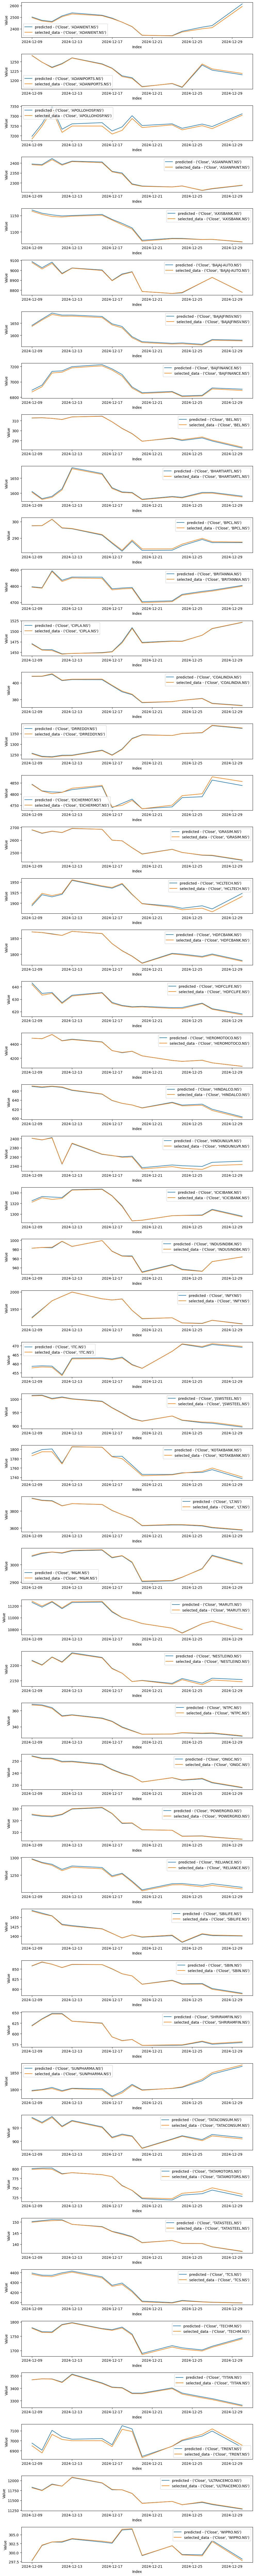

In [ ]:
import matplotlib.pyplot as plt

# Ensure the DataFrames are aligned by reindexing predictions_cleaned to match selected_data
predictions_cleaned_aligned = predictions_cleaned.reindex(selected_data.index)

# Number of stocks (columns)
num_stocks = predictions_cleaned_aligned.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=num_stocks, ncols=1, figsize=(10, 2*num_stocks))

# Plot each stock's data for the last 15 days
for i in range(num_stocks):
    stock_name = predictions_cleaned_aligned.columns[i]
    axes[i].plot(predictions_cleaned_aligned.iloc[-15:, i], label=f'predicted - {stock_name}')
    axes[i].plot(selected_data.iloc[-15:, i], label=f'selected_data - {stock_name}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


Top constituents by weightage in percentage

HDFC Bank Ltd. 12.24

ICICI Bank Ltd. 8.38

Reliance Industries Ltd. 8.14

Infosys Ltd. 6.42

Bharti Airtel Ltd. 4.13

Tata Consultancy Services Ltd. 3.98

Larsen & Toubro Ltd. 3.98

ITC Ltd. 3.94

State Bank of India 2.82

Axis Bank Ltd. 2.66

In [ ]:
import re
# Remove unwanted characters from selected_data column names
selected_data.columns = selected_data.columns.map(lambda x: re.sub('Close|[,\'\"\(\)]', '', x))

# Remove unwanted characters from data_open column names
predictions_cleaned.columns = predictions_cleaned.columns.map(lambda x: re.sub('Close|[,\'\"\(\)]', '', x))



            HDFCBANK.NS  ICICIBANK.NS  RELIANCE.NS     INFY.NS  BHARTIARTL.NS  \
Date                                                                            
2017-11-17   863.383667    309.584808   412.358429  409.775604     427.561218   
2017-11-20   869.342712    303.347382   416.405548  405.386383     426.824799   
2017-11-21   873.173523    304.632935   421.696259  407.791962     436.008484   
2017-11-22   877.429993    303.680695   420.882355  407.813080     432.412994   
2017-11-23   871.565552    304.204437   428.230499  418.342896     430.030457   

                 TCS.NS        LT.NS      ITC.NS     SBIN.NS  AXISBANK.NS  
Date                                                                       
2017-11-17  1158.505737  1087.612305  200.022186  317.669952   539.377136  
2017-11-20  1156.857910  1093.838623  200.952530  313.434357   542.111816  
2017-11-21  1143.806396  1087.478882  198.316605  311.222443   543.752563  
2017-11-22  1147.101440  1087.523071  200.138474  31

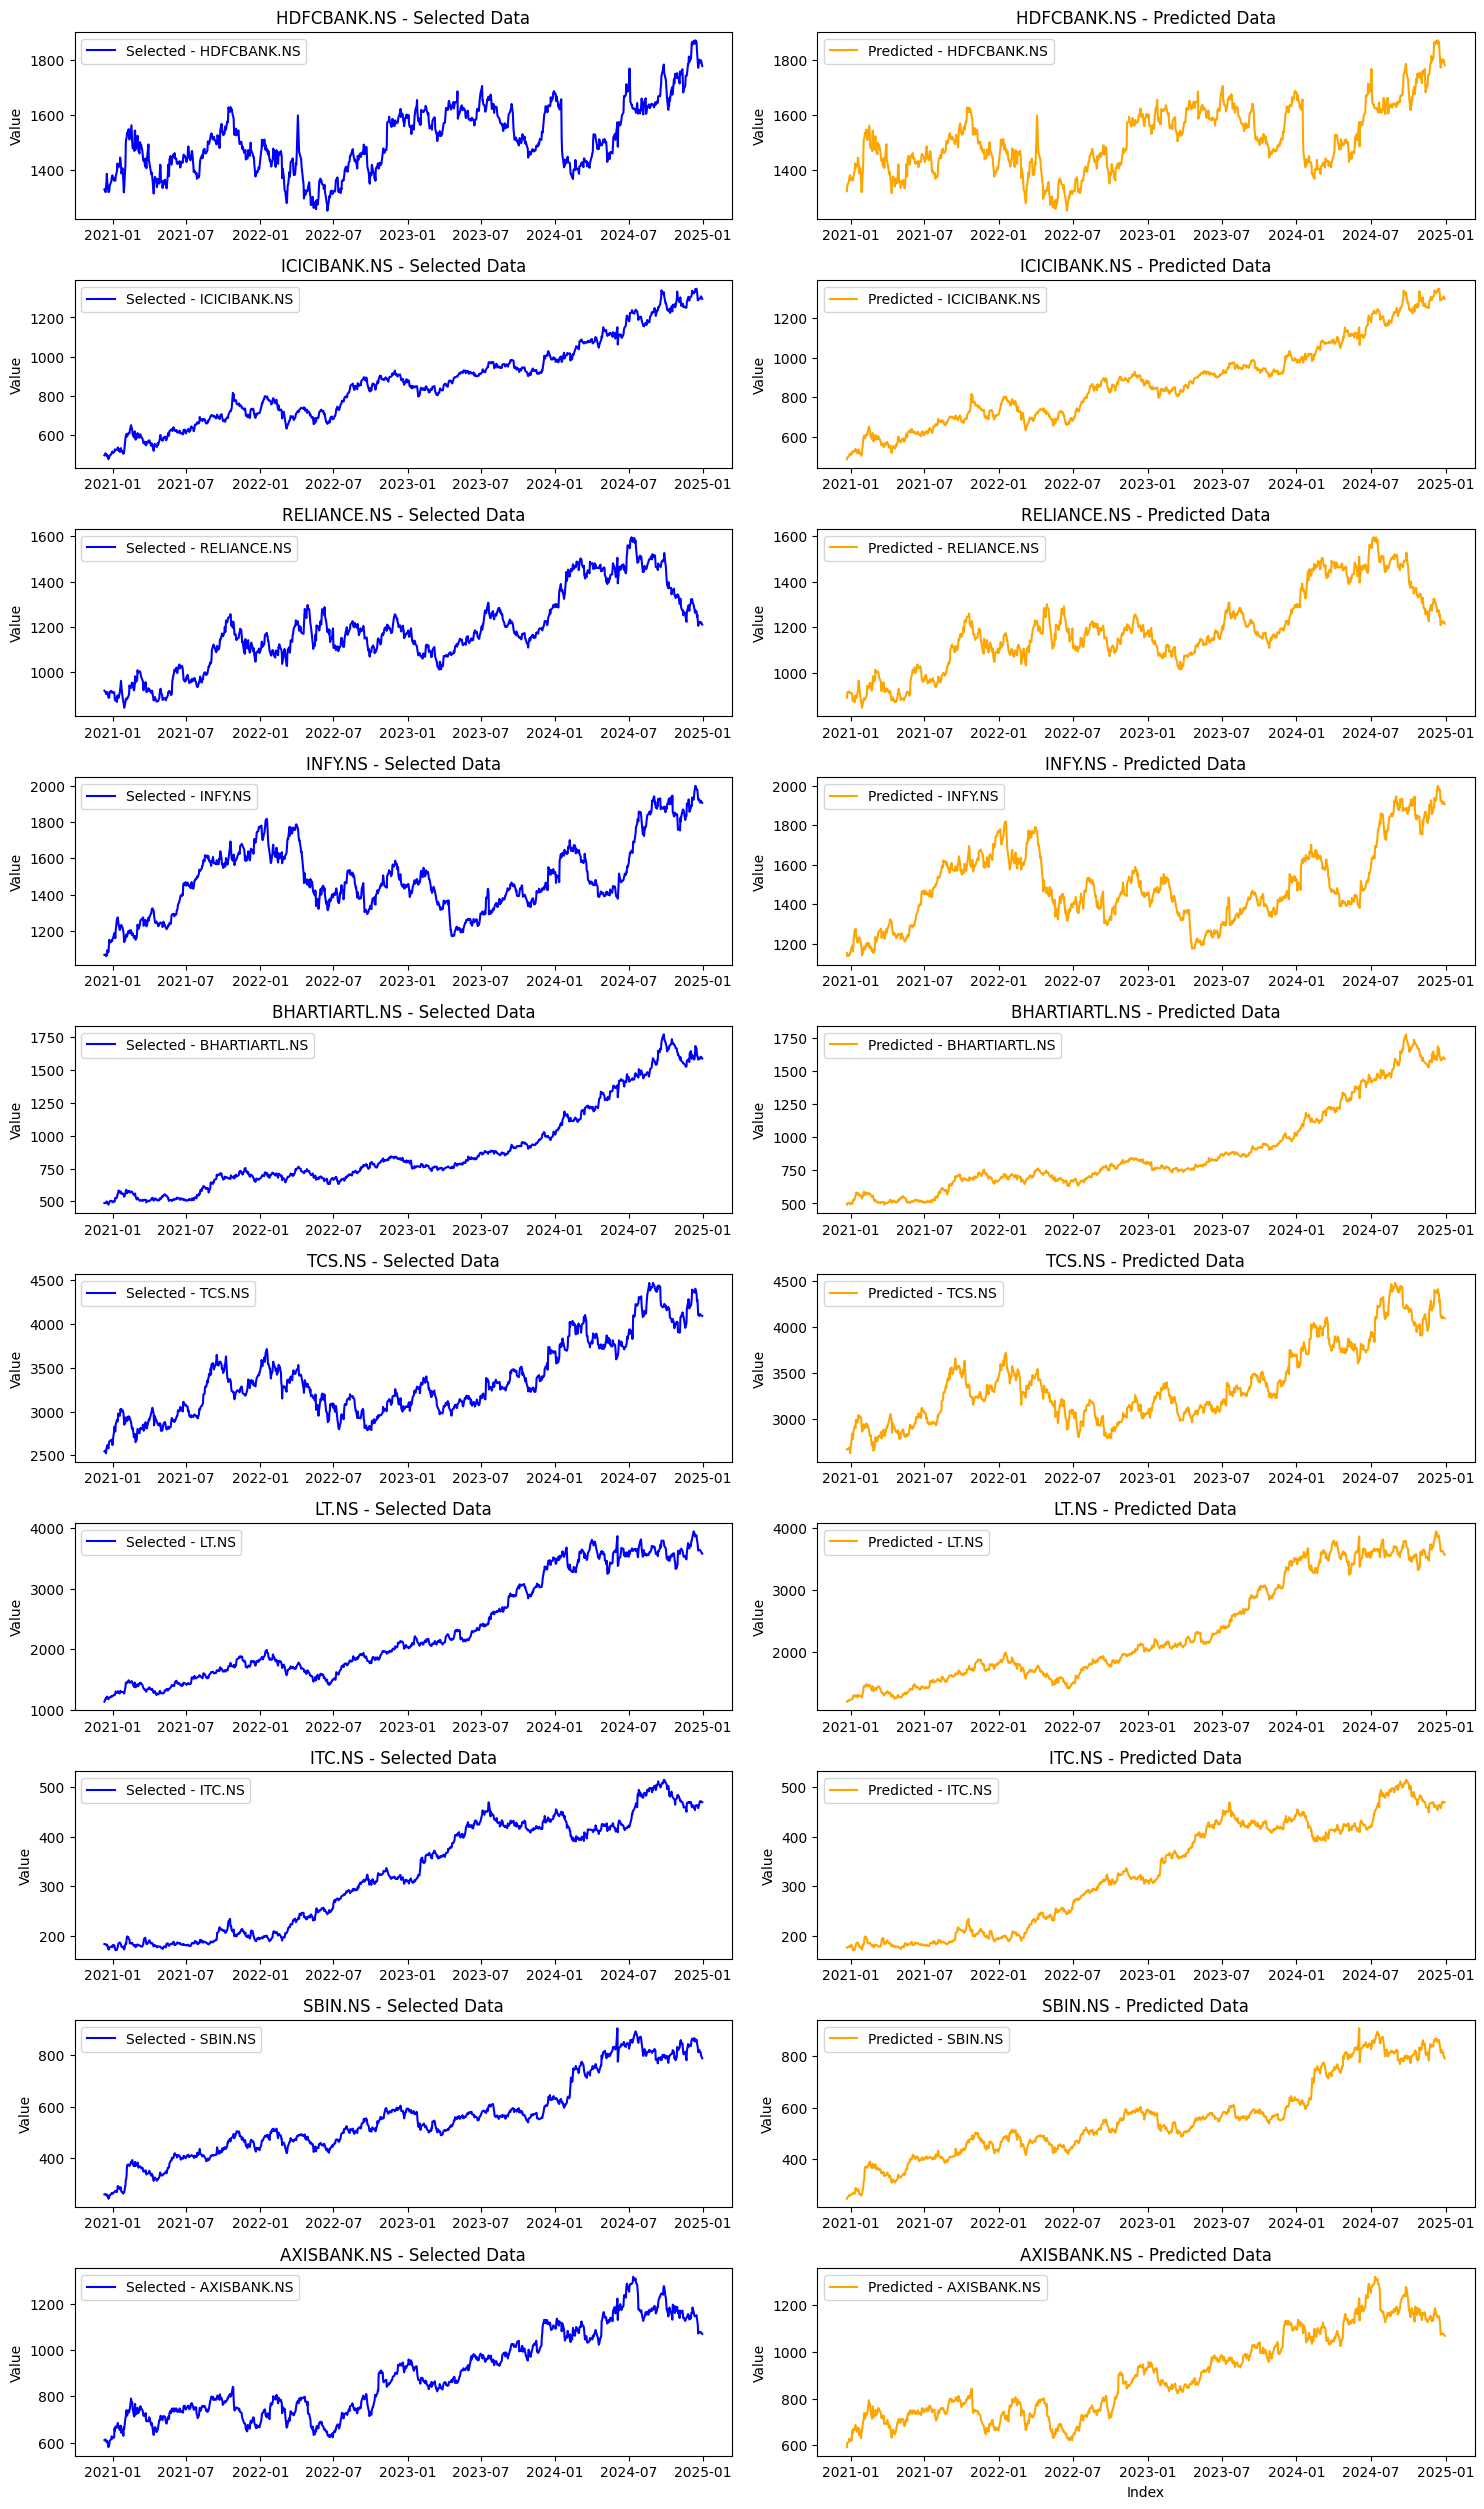

In [ ]:
import matplotlib.pyplot as plt

# Define the heavy-weight companies
heavy_wgt_companies = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'INFY.NS', 'BHARTIARTL.NS',
                       'TCS.NS', 'LT.NS', 'ITC.NS', 'SBIN.NS', 'AXISBANK.NS']

# Strip extra spaces from column names in selected_data and predictions_cleaned
selected_data.columns = selected_data.columns.str.strip()
predictions_cleaned.columns = predictions_cleaned.columns.str.strip()

# Select only the specified columns from selected_data and predictions_cleaned
selected_data_filtered = selected_data[heavy_wgt_companies]
predictions_cleaned_filtered = predictions_cleaned[heavy_wgt_companies]

# Verify the filtered data
print(selected_data_filtered.head())
print(predictions_cleaned_filtered.head())

# Create subplots for each company with 2 columns (one for selected data and one for predicted data)
fig, axes = plt.subplots(nrows=len(heavy_wgt_companies), ncols=2, figsize=(15, 2.5*len(heavy_wgt_companies)))

# Plot each stock's data for the last 1000 data points side by side
for i, company in enumerate(heavy_wgt_companies):
    if company in predictions_cleaned_filtered.columns and company in selected_data_filtered.columns:
        # Plot selected data on the left column
        axes[i, 0].plot(selected_data_filtered.index[-1000:], selected_data_filtered[company].iloc[-1000:], label=f'Selected - {company}', color='blue')
        axes[i, 0].set_title(f'{company} - Selected Data')
        axes[i, 0].set_ylabel('Value')
        axes[i, 0].legend()

        # Plot predicted data on the right column
        axes[i, 1].plot(predictions_cleaned_filtered.index[-1000:], predictions_cleaned_filtered[company].iloc[-1000:], label=f'Predicted - {company}', color='orange')
        axes[i, 1].set_title(f'{company} - Predicted Data')
        axes[i, 1].set_ylabel('Value')
        axes[i, 1].legend()

plt.tight_layout()
plt.xlabel('Index')
plt.show()

In [ ]:
# Filter data from 2020-12-23 onwards
filtered_selected_data = selected_data_filtered[selected_data_filtered.index >= '2020-12-23']
filtered_predictions = predictions_cleaned_filtered[predictions_cleaned_filtered.index >= '2020-12-23']

# Calculate absolute error
absolute_error = np.abs(filtered_selected_data - filtered_predictions)

# Calculate percentage error
percentage_error = (absolute_error / np.abs(filtered_selected_data)) * 100

# Display the percentage error
print(percentage_error)

            HDFCBANK.NS  ICICIBANK.NS  RELIANCE.NS   INFY.NS  BHARTIARTL.NS  \
Date                                                                          
2020-12-23     0.116634      0.341892     0.009608  0.043404       0.135803   
2020-12-24     0.099349      0.172257     0.020051  0.006258       0.082850   
2020-12-28     0.083673      0.037134     0.028348  0.092620       0.062430   
2020-12-29     0.079274      0.055683     0.033617  0.094259       0.073743   
2020-12-30     0.106096      0.074971     0.043035  0.091273       0.104368   
...                 ...           ...          ...       ...            ...   
2024-12-23     0.103855      0.009835     0.266993  0.001228       0.106740   
2024-12-24     0.131428      0.017250     0.272810  0.025976       0.122035   
2024-12-26     0.141156      0.064576     0.342405  0.039411       0.163043   
2024-12-27     0.139821      0.097680     0.378895  0.016761       0.146914   
2024-12-30     0.143921      0.101960     0.367606  

In [ ]:
# Assuming 'percentage_error' is the DataFrame containing percentage errors for all stocks
mean_percentage_error_per_stock = percentage_error.mean()

# Display the MPE for each stock
print(mean_percentage_error_per_stock)

HDFCBANK.NS      0.099044
ICICIBANK.NS     0.177935
RELIANCE.NS      0.147103
INFY.NS          0.100936
BHARTIARTL.NS    0.170946
TCS.NS           0.162493
LT.NS            0.108471
ITC.NS           0.091576
SBIN.NS          0.107425
AXISBANK.NS      0.175569
dtype: float64


In [ ]:
# Or, calculate statistics like mean percentage error
mean_percentage_error = np.mean(percentage_error)
print(f"Mean Percentage Error {mean_percentage_error}")

Mean Percentage Error 0.1341498745304923


frequency of trading


In [ ]:
filtered_data = future_predictions_df.iloc[::10,]
filtered_data

,"('Close', 'ADANIENT.NS')","('Close', 'ADANIPORTS.NS')","('Close', 'APOLLOHOSP.NS')","('Close', 'ASIANPAINT.NS')","('Close', 'AXISBANK.NS')","('Close', 'BAJAJ-AUTO.NS')","('Close', 'BAJAJFINSV.NS')","('Close', 'BAJFINANCE.NS')","('Close', 'BEL.NS')","('Close', 'BHARTIARTL.NS')",...,"('Close', 'SUNPHARMA.NS')","('Close', 'TATACONSUM.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'TCS.NS')","('Close', 'TECHM.NS')","('Close', 'TITAN.NS')","('Close', 'TRENT.NS')","('Close', 'ULTRACEMCO.NS')","('Close', 'WIPRO.NS')"
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,0.000055,0.001027,0.001166,0.003019,0.003893,0.000152,0.002734,0.002556,0.000158,0.001358,...,0.000386,0.001354,0.002227,0.000115,0.002117,0.002610,-0.000325,0.005228,0.000378,0.001019
2021-01-07,0.001979,-0.000257,-0.000289,0.002628,0.001070,0.000332,0.001619,0.001695,-0.003096,0.000645,...,0.000765,0.001059,0.000514,0.001071,0.003050,0.003248,0.000027,0.004194,-0.000001,0.000241
2021-01-21,0.004509,0.000034,0.001249,0.002488,0.003801,-0.001102,0.003581,0.004264,-0.000988,0.002928,...,0.002546,0.002510,0.001357,0.005051,0.002803,0.002113,0.000448,0.005751,0.003465,-0.000635
2021-02-05,0.005144,-0.002342,-0.000506,0.001015,-0.001781,-0.000258,-0.001593,0.002390,0.000291,0.002736,...,-0.002615,-0.000336,-0.003077,-0.001128,0.001447,-0.001998,0.002053,0.000638,-0.001225,0.000669
2021-02-19,-0.004841,0.001959,0.001633,0.003210,0.003754,0.003147,0.001629,0.001891,0.003811,0.002517,...,0.004307,0.002339,0.006341,0.004314,0.003718,-0.001470,0.001290,0.008361,0.002061,-0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29,0.005940,-0.001766,0.001072,-0.000251,-0.002020,-0.000487,0.002156,0.000204,-0.001461,0.000242,...,-0.002412,0.002801,-0.009577,-0.000529,0.000661,0.002096,0.002243,-0.001061,-0.001180,0.001601
2024-11-12,0.003752,-0.000199,0.000746,-0.000401,0.000174,0.000843,0.000845,0.001884,0.002660,0.003194,...,-0.001109,0.000662,-0.001040,-0.000717,0.001691,0.000762,0.000425,0.000914,-0.000160,0.000488
2024-11-28,0.006764,-0.002541,-0.000038,-0.001941,-0.001089,0.000302,0.000814,0.003501,-0.000079,0.001134,...,-0.005812,0.005307,-0.004310,-0.002438,0.000670,0.000445,0.001253,-0.000904,-0.001350,0.000608


In [ ]:
# Get the top 4 ' Close' values for each row (day)
top_4_values = filtered_data.apply(lambda row: row.nlargest(4).index.tolist(), axis=1)

# Set the index to match filtered_data
top_4_values.index = filtered_data.index

# Convert the Series of lists to a DataFrame
top_4_df = pd.DataFrame(top_4_values.tolist(), index=top_4_values.index, columns=['Top 1', 'Top 2', 'Top 3', 'Top 4'])

# Display the DataFrame
top_4_df

,Top 1,Top 2,Top 3,Top 4
Date,,,,
2020-12-23,"('Close', 'KOTAKBANK.NS')","('Close', 'TRENT.NS')","('Close', 'AXISBANK.NS')","('Close', 'ICICIBANK.NS')"
2021-01-07,"('Close', 'TRENT.NS')","('Close', 'KOTAKBANK.NS')","('Close', 'TECHM.NS')","('Close', 'TCS.NS')"
2021-01-21,"('Close', 'KOTAKBANK.NS')","('Close', 'TRENT.NS')","('Close', 'ICICIBANK.NS')","('Close', 'TATASTEEL.NS')"
2021-02-05,"('Close', 'NESTLEIND.NS')","('Close', 'ADANIENT.NS')","('Close', 'SBILIFE.NS')","('Close', 'HDFCLIFE.NS')"
2021-02-19,"('Close', 'TRENT.NS')","('Close', 'TATAMOTORS.NS')","('Close', 'TATASTEEL.NS')","('Close', 'SUNPHARMA.NS')"
...,...,...,...,...
2024-10-29,"('Close', 'ADANIENT.NS')","('Close', 'HCLTECH.NS')","('Close', 'TATACONSUM.NS')","('Close', 'HINDALCO.NS')"
2024-11-12,"('Close', 'ADANIENT.NS')","('Close', 'RELIANCE.NS')","('Close', 'BHARTIARTL.NS')","('Close', 'BRITANNIA.NS')"
2024-11-28,"('Close', 'ADANIENT.NS')","('Close', 'TATACONSUM.NS')","('Close', 'HCLTECH.NS')","('Close', 'HINDALCO.NS')"


In [ ]:
# Remove 'Adj Close', commas, inverted commas, and curved brackets
for col in top_4_df.columns:
    top_4_df[col] = top_4_df[col].str.replace('Close', '').str.replace('[,\'\"\(\)\\[\\]]', '', regex=True)

# Display the modified DataFrame
print(top_4_df)

                    Top 1           Top 2           Top 3          Top 4
Date                                                                    
2020-12-23   KOTAKBANK.NS        TRENT.NS     AXISBANK.NS   ICICIBANK.NS
2021-01-07       TRENT.NS    KOTAKBANK.NS        TECHM.NS         TCS.NS
2021-01-21   KOTAKBANK.NS        TRENT.NS    ICICIBANK.NS   TATASTEEL.NS
2021-02-05   NESTLEIND.NS     ADANIENT.NS      SBILIFE.NS    HDFCLIFE.NS
2021-02-19       TRENT.NS   TATAMOTORS.NS    TATASTEEL.NS   SUNPHARMA.NS
...                   ...             ...             ...            ...
2024-10-29    ADANIENT.NS      HCLTECH.NS   TATACONSUM.NS    HINDALCO.NS
2024-11-12    ADANIENT.NS     RELIANCE.NS   BHARTIARTL.NS   BRITANNIA.NS
2024-11-28    ADANIENT.NS   TATACONSUM.NS      HCLTECH.NS    HINDALCO.NS
2024-12-12       TRENT.NS     AXISBANK.NS     RELIANCE.NS    ADANIENT.NS
2024-12-27    ADANIENT.NS     HINDALCO.NS     RELIANCE.NS     HCLTECH.NS

[100 rows x 4 columns]


In [ ]:
import re
# Remove unwanted characters from selected_data column names
selected_data.columns = selected_data.columns.map(lambda x: re.sub('Close|[,\'\"\(\)]', '', x))

# Remove unwanted characters from data_open column names
data_open.columns = data_open.columns.map(lambda x: re.sub('Open|[,\'\"\(\)]', '', x))

# Display the modified DataFrames
print(selected_data.head())
print(data_open.head())

            ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2017-11-17    83.979095     384.684998    1029.646362    1109.959717   
2017-11-20    86.016914     382.430450    1034.282593    1105.269165   
2017-11-21    82.289848     384.541077    1081.331055    1099.536011   
2017-11-22    84.622612     397.685364    1122.034912    1112.802734   
2017-11-23    81.780411     390.585541    1112.322388    1098.872559   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
Date                                                                   
2017-11-17   539.377136    2637.366211     511.470184    1751.500488   
2017-11-20   542.111816    2666.274170     515.837280    1769.041626   
2017-11-21   543.752563    2714.179688     519.092773    1773.451538   
2017-11-22   537.487671    2724.830078     516.116455    1738.369385   
2017-11-23   541.117310    2684.901367     511.854095    1728.2

In [ ]:
selected_data_filtered = selected_data[selected_data.index >= '2020-12-23']
data_open_filtered = data_open[data_open.index >= '2020-12-23']

In [ ]:
selected_data_10days = selected_data_filtered.iloc[::10]
data_open_10days = data_open_filtered.iloc[::10]

In [ ]:
# Preprocessing for top_4_df
for col in top_4_df.columns:
    top_4_df[col] = top_4_df[col].str.strip()  # Remove leading/trailing spaces




In [ ]:
buy_close = selected_data_10days
sell_open = data_open_10days
# Preprocessing for buy_close and sell_open
buy_close.columns = buy_close.columns.str.strip()
sell_open.columns = sell_open.columns.str.strip()
print( buy_close)
print( sell_open)

            ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2020-12-23   462.446320     459.188446    2404.270508    2556.693115   
2021-01-07   516.810669     501.229858    2478.113770    2701.529297   
2021-01-21   535.563965     534.199829    2553.685791    2628.095703   
2021-02-05   593.868469     553.025757    2705.372559    2299.529297   
2021-02-19   779.954285     637.450073    2884.522461    2337.939209   
...                 ...            ...            ...            ...   
2024-10-29  2848.600098    1372.699951    6977.581055    2987.729004   
2024-11-12  2870.000000    1326.000000    7009.635254    2470.615234   
2024-11-28  2437.100098    1167.599976    6831.437988    2458.050049   
2024-12-12  2504.100098    1244.000000    7216.892578    2389.550049   
2024-12-27  2409.949951    1230.699951    7236.065430    2271.399902   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJAJFINSV.NS  BAJFINAN

LSTM strategy


In [ ]:
import pandas as pd
import numpy as np

# Initialize capital
capital = 1000000

# Create an empty list to store the results of each trade
trade_results = []

# Loop through the dates for trading
for i in range(len(top_4_df) - 1):
    buy_date = top_4_df.index[i]
    sell_date = top_4_df.index[i + 1]

    # Get the stocks to buy from the top_4_df for the current date
    stocks_to_buy = top_4_df.loc[buy_date, ['Top 1', 'Top 2', 'Top 3', 'Top 4']].values

    # Filter out None values from stocks_to_buy
    valid_stocks = [stock for stock in stocks_to_buy if stock is not None]

    # Count the number of valid stocks
    num_of_stocks = len(valid_stocks)

    #Check if the number of stocks is zero
    if num_of_stocks > 0: # Only proceed if there are stocks to buy
        try:
            buy_prices = buy_close.loc[buy_date, valid_stocks].values
            sell_prices = sell_open.loc[sell_date, valid_stocks].values  # Get sell prices here
        except KeyError:
            # Handle missing data, if any
            continue
    # Calculate the amount to invest in each stock
    investment_per_stock = capital / num_of_stocks

    # Calculate the number of shares to buy for each stock
    shares = np.floor(investment_per_stock / buy_prices).astype(int)  # Ensure whole numbers

    # Calculate buy cost
    buy_cost = shares * buy_prices
    buy_cost_after_stt = buy_cost * (1 + 0.001)  # Adding STT to buy cost

    # Get the corresponding sell prices using valid_stocks
    #try:
    sell_prices = sell_open.loc[sell_date, valid_stocks].values
    #except KeyError:
        # Handle the case where stocks might not have data for sell_date
        #print(f"Skipping sell date {sell_date} due to missing data in sell_open")
        #continue # Skip to the next iteration of the loop

    # Calculate sell amounts
    sell_amounts = shares * sell_prices
    sell_amounts_after_stt = sell_amounts * (1 - 0.001)  # Deducting STT from sell amount

    # Calculate total sell amount and trade return
    total_sell_amount = sum(sell_amounts_after_stt) #Sell
    trade_return = total_sell_amount - sum(buy_cost_after_stt)

    # Update capital for the next round of buying (reinvestment)
    capital = total_sell_amount

    # Record the trade details in the trade_results list
    for j in range(len(valid_stocks)):  #Changed from stocks_to_buy to valid_stocks
        trade_results.append({
            'buy_date': buy_date,
            'sell_date': sell_date,
            'stock': valid_stocks[j], #Changed from stocks_to_buy to valid_stocks
            'buy_price': buy_prices[j],
            'sell_price': sell_prices[j],
            'shares_quantity': shares[j],
            'invested_amount': buy_cost_after_stt[j],
            'returns': ((sell_amounts_after_stt[j] - buy_cost_after_stt[j]) / buy_cost_after_stt[j]
    if buy_cost_after_stt[j] != 0 else np.nan)  # Handle division by zero
        })

# Convert the list of trade results into a DataFrame
trade_df = pd.DataFrame(trade_results)

# Print or analyze the trade_df DataFrame
print(trade_df)

      buy_date  sell_date         stock    buy_price   sell_price  \
0   2020-12-23 2021-01-07  KOTAKBANK.NS  1914.964355  1978.023710   
1   2020-12-23 2021-01-07      TRENT.NS   677.679077   672.850520   
2   2020-12-23 2021-01-07   AXISBANK.NS   589.879883   656.141175   
3   2020-12-23 2021-01-07  ICICIBANK.NS   486.809265   533.740647   
4   2021-01-07 2021-01-21      TRENT.NS   672.452332   681.959967   
..         ...        ...           ...          ...          ...   
391 2024-11-28 2024-12-12   HINDALCO.NS   650.250000   675.000000   
392 2024-12-12 2024-12-27      TRENT.NS  7012.500000  7101.000000   
393 2024-12-12 2024-12-27   AXISBANK.NS  1145.650024  1078.099976   
394 2024-12-12 2024-12-27   RELIANCE.NS  1262.900024  1218.300049   
395 2024-12-12 2024-12-27   ADANIENT.NS  2504.100098  2415.000000   

     shares_quantity  invested_amount   returns  
0                130    249194.311577  0.030866  
1                368    249635.286291 -0.009109  
2                423 

In [ ]:
total_investment_per_date = trade_df.groupby('buy_date')['invested_amount'].sum()


In [ ]:
print(total_investment_per_date)

buy_date
2020-12-23    9.985812e+05
2021-01-07    1.054121e+06
2021-01-21    1.079825e+06
2021-02-05    1.122527e+06
2021-02-19    1.237232e+06
                  ...     
2024-10-15    2.639500e+06
2024-10-29    2.497416e+06
2024-11-12    2.476347e+06
2024-11-28    2.386707e+06
2024-12-12    2.429794e+06
Name: invested_amount, Length: 99, dtype: float64


In [ ]:

# Create returns_10days_interval DataFrame with buy_date as index
returns_10days_interval = pd.DataFrame(index=total_investment_per_date.index)




In [ ]:
# Calculate daily returns using the whole number values
returns_10days_interval['returns_on_trade'] = total_investment_per_date.pct_change().dropna()
returns_10days_interval['cumulative_returns'] = (returns_10days_interval['returns_on_trade'] + 1).cumprod() - 1
# Group by 'buy_date' and sum 'invested_amount' for each date
returns_10days_interval['total_investment_per_date'] = trade_df.groupby('buy_date')['invested_amount'].sum().astype(int)
combined_df = pd.DataFrame({
    'returns_on_trade': returns_10days_interval['returns_on_trade'],
    'cumulative_returns': returns_10days_interval['cumulative_returns'],
    'investment_per_date': returns_10days_interval['total_investment_per_date']
})
combined_df

,returns_on_trade,cumulative_returns,investment_per_date
buy_date,,,
2020-12-23,NaN,NaN,998581
2021-01-07,0.055619,0.055619,1054120
2021-01-21,0.024385,0.081360,1079825
2021-02-05,0.039545,0.124122,1122527
2021-02-19,0.102184,0.238990,1237232
...,...,...,...
2024-10-15,-0.001016,1.643250,2639500
2024-10-29,-0.053830,1.500964,2497415
2024-11-12,-0.008436,1.479865,2476346


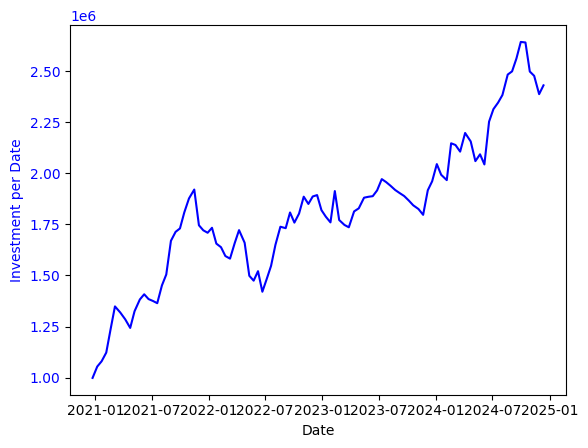

In [ ]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot 'investment_per_date' on the primary y-axis (ax1)
ax1.plot(combined_df.index, combined_df['investment_per_date'], 'b-', label='Investment per Date')
ax1.set_xlabel('Date')
ax1.set_ylabel('Investment per Date', color='b')
ax1.tick_params('y', labelcolor='b')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()


# Display the plot
plt.show()

In [ ]:
combined_df[1:].describe()

,returns_on_trade,cumulative_returns,investment_per_date
count,98.000000,98.000000,9.800000e+01
mean,0.009902,0.822311,1.819725e+06
std,0.040095,0.351056,3.505574e+05
min,-0.097284,0.055619,1.054120e+06
25%,-0.014903,0.643200,1.640868e+06
50%,0.004960,0.813360,1.810787e+06
75%,0.038228,0.967547,1.964754e+06
max,0.109545,1.645939,2.642184e+06


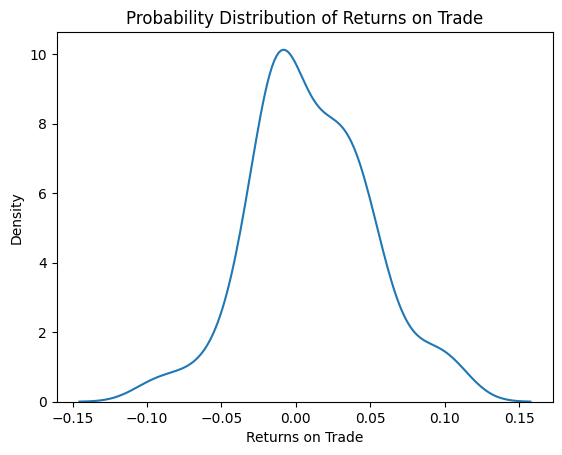

In [ ]:

import seaborn as sns

sns.kdeplot(combined_df['returns_on_trade'].iloc[1:])
plt.xlabel('Returns on Trade')
plt.ylabel('Density')
plt.title('Probability Distribution of Returns on Trade')
plt.show()

In [ ]:
# Define the ranges for your frequency table
bins = [-0.20,-0.15,-0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,1]  # Adjust ranges as needed

# Create the frequency table using pd.cut and value_counts
frequency_table = pd.cut(combined_df['returns_on_trade'].iloc[1:], bins=bins).value_counts().sort_index()

# Display the frequency table
print(frequency_table)

returns_on_trade
(-0.2, -0.15]     0
(-0.15, -0.1]     0
(-0.1, -0.05]     5
(-0.05, 0.0]     41
(0.0, 0.05]      40
(0.05, 0.1]       9
(0.1, 0.15]       3
(0.15, 0.2]       0
(0.2, 0.25]       0
(0.25, 0.3]       0
(0.3, 0.35]       0
(0.35, 0.4]       0
(0.4, 0.45]       0
(0.45, 0.5]       0
(0.5, 1.0]        0
Name: count, dtype: int64


In [ ]:

# Group the data into 4 groups of  rows each
groups = [combined_df.iloc[i:i + 25] for i in range(0, len(combined_df), 25)]


# Calculate annual returns for each group
# Dynamically create the years list based on the number of groups
years = [f'Year {i+1}' for i in range(len(groups))]  # Updated years list
LSTM_annual_returns = []
for group in groups:
    # Calculate the cumulative return for the group's 'investment_per_date' column
    yearly_returns = (group['investment_per_date'].iloc[-1] - group['investment_per_date'].iloc[0]) / group['investment_per_date'].iloc[0]
    percentage_return = yearly_returns * 100 # Calculate percentage return
    LSTM_annual_returns.append(percentage_return)

# Create a new DataFrame with year and annual returns
LSTM_annual_returns_df = pd.DataFrame({'Year': years, 'Annual Return': LSTM_annual_returns})

# Display the annual returns DataFrame
print(LSTM_annual_returns_df)

     Year  Annual Return
0  Year 1      72.312011
1  Year 2      10.786526
2  Year 3       7.761882
3  Year 4      18.846562


In [ ]:

!pip install PyPortfolioOpt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
# Remove unwanted characters from predictions_cleaned column names
predictions_cleaned.columns = predictions_cleaned.columns.map(lambda x: re.sub(' Close|[,\'\"\(\)\[\]]', '', x))


ichimoku features to LSTM model



In [ ]:
# Function to calculate Ichimoku components using only closing prices
def ichimoku_cloud(df):
    close = df.iloc[:, 0]  # Get the closing price column (first column)
    nine_period_high = close.rolling(window=9).max()
    nine_period_low = close.rolling(window=9).min()
    senkou_span_a = ((nine_period_high + nine_period_low) / 2).shift(26)
    senkou_span_b = ((close.rolling(window=52).max() + close.rolling(window=52).min()) / 2).shift(26)
    tenkan_sen = ((nine_period_high + nine_period_low) / 2)
    kijun_sen = ((close.rolling(window=26).max() + close.rolling(window=26).min()) / 2)
    chikou_span = close.shift(-26)
    return pd.DataFrame({
        'senkou_span_a': senkou_span_a,
        'senkou_span_b': senkou_span_b,
        'tenkan_sen': tenkan_sen,
        'kijun_sen': kijun_sen,
        'chikou_span': chikou_span
    }, index=df.index)



In [ ]:
ichimoku_data = {}
for stock in predictions_cleaned.columns:
    stock_data = predictions_cleaned[[stock]]  # Select data for one stock
    ichimoku_components = ichimoku_cloud(stock_data)
    ichimoku_components.columns = [f'{col}_{stock}' for col in ichimoku_components.columns]
    ichimoku_data[stock] = ichimoku_components
# Combine Ichimoku indicators into a single DataFrame
ichimoku_df = pd.concat(ichimoku_data.values(), axis=1)


In [ ]:
ichimoku_df

,senkou_span_a_ADANIENT.NS,senkou_span_b_ADANIENT.NS,tenkan_sen_ADANIENT.NS,kijun_sen_ADANIENT.NS,chikou_span_ADANIENT.NS,senkou_span_a_ADANIPORTS.NS,senkou_span_b_ADANIPORTS.NS,tenkan_sen_ADANIPORTS.NS,kijun_sen_ADANIPORTS.NS,chikou_span_ADANIPORTS.NS,...,senkou_span_a_ULTRACEMCO.NS,senkou_span_b_ULTRACEMCO.NS,tenkan_sen_ULTRACEMCO.NS,kijun_sen_ULTRACEMCO.NS,chikou_span_ULTRACEMCO.NS,senkou_span_a_WIPRO.NS,senkou_span_b_WIPRO.NS,tenkan_sen_WIPRO.NS,kijun_sen_WIPRO.NS,chikou_span_WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,NaN,NaN,NaN,NaN,538.772629,NaN,NaN,NaN,NaN,528.981415,...,NaN,NaN,NaN,NaN,5628.318225,NaN,NaN,NaN,NaN,205.825952
2020-12-24,NaN,NaN,NaN,NaN,565.837502,NaN,NaN,NaN,NaN,536.282732,...,NaN,NaN,NaN,NaN,5993.696092,NaN,NaN,NaN,NaN,209.212717
2020-12-28,NaN,NaN,NaN,NaN,569.209508,NaN,NaN,NaN,NaN,545.077165,...,NaN,NaN,NaN,NaN,5940.281631,NaN,NaN,NaN,NaN,211.765475
2020-12-29,NaN,NaN,NaN,NaN,593.092053,NaN,NaN,NaN,NaN,553.079995,...,NaN,NaN,NaN,NaN,6042.028527,NaN,NaN,NaN,NaN,210.056058
2020-12-30,NaN,NaN,NaN,NaN,596.923116,NaN,NaN,NaN,NaN,551.730677,...,NaN,NaN,NaN,NaN,6212.072532,NaN,NaN,NaN,NaN,207.812703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2944.121433,2945.840151,2439.029557,2498.238135,NaN,1339.498490,1391.894913,1221.912794,1202.251974,NaN,...,11021.432441,11405.729734,11751.323718,11354.544261,NaN,273.332580,266.708274,302.820079,288.754244,NaN
2024-12-24,2944.121433,2945.840151,2439.029557,2498.238135,NaN,1316.544508,1373.426354,1220.776181,1202.251974,NaN,...,10999.323271,11405.729734,11732.132373,11354.544261,NaN,273.332580,266.708274,302.820079,288.754244,NaN
2024-12-26,2943.354583,2945.840151,2439.029557,2498.238135,NaN,1316.544508,1370.261952,1220.776181,1202.251974,NaN,...,10946.719748,11354.809605,11732.132373,11420.481737,NaN,274.053996,266.708274,302.820079,289.920008,NaN


In [ ]:
combined_price = pd.concat([predictions_cleaned, ichimoku_df], axis=1)
combined_price

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,...,senkou_span_a_ULTRACEMCO.NS,senkou_span_b_ULTRACEMCO.NS,tenkan_sen_ULTRACEMCO.NS,kijun_sen_ULTRACEMCO.NS,chikou_span_ULTRACEMCO.NS,senkou_span_a_WIPRO.NS,senkou_span_b_WIPRO.NS,tenkan_sen_WIPRO.NS,kijun_sen_WIPRO.NS,chikou_span_WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,462.471568,459.659918,2407.075000,2564.411708,592.176014,2968.027135,902.199509,5028.479525,35.515969,491.315426,...,NaN,NaN,NaN,NaN,5628.318225,NaN,NaN,NaN,NaN,205.825952
2020-12-24,472.674107,467.247723,2386.235383,2568.307625,610.047568,3025.717031,900.072618,5119.510875,35.326609,500.834186,...,NaN,NaN,NaN,NaN,5993.696092,NaN,NaN,NaN,NaN,209.212717
2020-12-28,489.543700,472.008628,2360.987790,2601.970737,616.996948,3061.778535,899.891530,5137.236093,35.219929,504.894262,...,NaN,NaN,NaN,NaN,5940.281631,NaN,NaN,NaN,NaN,211.765475
2020-12-29,487.328432,471.595868,2348.381591,2615.647778,629.229918,3077.408189,897.284339,5134.697720,35.281666,503.644413,...,NaN,NaN,NaN,NaN,6042.028527,NaN,NaN,NaN,NaN,210.056058
2020-12-30,482.746137,473.563020,2367.462246,2651.569503,623.377283,3093.077866,895.241048,5265.282303,35.183669,499.828214,...,NaN,NaN,NaN,NaN,6212.072532,NaN,NaN,NaN,NaN,207.812703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2341.019387,1191.171941,7260.302953,2279.625436,1080.444705,8767.264847,1566.552876,6874.111568,292.309332,1588.593881,...,11021.432441,11405.729734,11751.323718,11354.544261,NaN,273.332580,266.708274,302.820079,288.754244,NaN
2024-12-24,2378.763299,1181.056592,7237.552667,2284.648012,1080.282763,8773.808644,1568.176528,6816.456609,290.000847,1585.832930,...,10999.323271,11405.729734,11732.132373,11354.544261,NaN,273.332580,266.708274,302.820079,288.754244,NaN
2024-12-26,2414.102799,1241.081718,7259.121643,2261.469710,1076.980787,8877.698262,1562.390912,6824.360883,292.618467,1602.107866,...,10946.719748,11354.809605,11732.132373,11420.481737,NaN,274.053996,266.708274,302.820079,289.920008,NaN


In [ ]:
# Perform forward fill to fill NAs with the previous valid value
filled_df = combined_price.ffill()

# Perform backward fill to fill remaining NAs with the next valid value
filled_df = filled_df.bfill()

In [ ]:
filled_df[:200]

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,...,senkou_span_a_ULTRACEMCO.NS,senkou_span_b_ULTRACEMCO.NS,tenkan_sen_ULTRACEMCO.NS,kijun_sen_ULTRACEMCO.NS,chikou_span_ULTRACEMCO.NS,senkou_span_a_WIPRO.NS,senkou_span_b_WIPRO.NS,tenkan_sen_WIPRO.NS,kijun_sen_WIPRO.NS,chikou_span_WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,462.471568,459.659918,2407.075000,2564.411708,592.176014,2968.027135,902.199509,5028.479525,35.515969,491.315426,...,5088.204927,5802.286149,5088.204927,5232.068437,5628.318225,192.578036,205.252995,192.578036,205.252995,205.825952
2020-12-24,472.674107,467.247723,2386.235383,2568.307625,610.047568,3025.717031,900.072618,5119.510875,35.326609,500.834186,...,5088.204927,5802.286149,5088.204927,5232.068437,5993.696092,192.578036,205.252995,192.578036,205.252995,209.212717
2020-12-28,489.543700,472.008628,2360.987790,2601.970737,616.996948,3061.778535,899.891530,5137.236093,35.219929,504.894262,...,5088.204927,5802.286149,5088.204927,5232.068437,5940.281631,192.578036,205.252995,192.578036,205.252995,211.765475
2020-12-29,487.328432,471.595868,2348.381591,2615.647778,629.229918,3077.408189,897.284339,5134.697720,35.281666,503.644413,...,5088.204927,5802.286149,5088.204927,5232.068437,6042.028527,192.578036,205.252995,192.578036,205.252995,210.056058
2020-12-30,482.746137,473.563020,2367.462246,2651.569503,623.377283,3093.077866,895.241048,5265.282303,35.183669,499.828214,...,5088.204927,5802.286149,5088.204927,5232.068437,6212.072532,192.578036,205.252995,192.578036,205.252995,207.812703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07,1524.204131,723.146947,4383.590145,3208.477059,775.353860,3556.512960,1747.572153,7663.243096,64.285110,684.830940,...,7455.564561,7135.991046,7381.567962,7573.217703,7760.099103,307.679984,284.548002,314.565236,322.585423,322.582862
2021-10-08,1548.621546,727.387521,4336.005019,3224.667107,781.240358,3544.782397,1757.459703,7651.070987,63.468509,687.509680,...,7455.564561,7135.991046,7356.070560,7565.280161,7741.541306,307.946841,284.814859,316.296927,322.585423,322.853215
2021-10-11,1542.442079,724.839276,4335.079172,3221.396949,786.565086,3575.508063,1773.551551,7735.591353,66.070125,682.099953,...,7512.814415,7193.240900,7315.448558,7563.045455,7659.672985,312.462645,287.191566,316.296927,322.585423,317.720322


In [ ]:
def get_top_4_stocks_without_threshold(df):


    # Get columns related to Ichimoku Cloud components
    chikou_span_cols = [col for col in df.columns if 'chikou_span' in col]
    senkou_span_a_cols = [col for col in df.columns if 'senkou_span_a' in col]
    #senkou_span_b_cols = [col for col in df.columns if 'senkou_span_b' in col]

    # Create a DataFrame to store the results
    results = []

    # Iterate through each row (date)
    for index in df.index:
        # Get values for the current date
        chikou_spans = df.loc[index, chikou_span_cols].values
        senkou_span_as = df.loc[index, senkou_span_a_cols].values
        #senkou_span_bs = df.loc[index, senkou_span_b_cols].values

        # Calculate percentage differences for all stocks
        percentage_diffs = (chikou_spans - senkou_span_as) / senkou_span_as

        # Filter out negative percentage differences and NaNs
        valid_indices = np.where((percentage_diffs > 0) & (~np.isnan(percentage_diffs)))[0]

        # If no valid indices, skip to the next date
        if not valid_indices.size:
            results.append({'Date': index, 'Top 1': None, 'Top 2': None, 'Top 3': None, 'Top 4': None})
            continue

        percentage_diffs = percentage_diffs[valid_indices]
        chikou_spans = chikou_spans[valid_indices]
        senkou_span_as = senkou_span_as[valid_indices]

        stock_symbols = [chikou_span_cols[i].split('_')[-1] for i in valid_indices]

        # Find stocks meeting the conditions among positive differences, sorted by percentage_diffs
        top_stocks = []
        for i in range(len(percentage_diffs)):
            if (chikou_spans[i] > senkou_span_as[i] ):
                top_stocks.append((stock_symbols[i], percentage_diffs[i]))  # Store stock and its percentage difference

        # Sort by percentage difference in descending order
        top_stocks.sort(key=lambda item: item[1], reverse=True)

        # Get only the stock symbols
        top_stocks = [item[0] for item in top_stocks]

        # Pad with None if less than 4 stocks are found
        top_stocks = top_stocks + [None] * (4 - len(top_stocks))


        # Create a dictionary for the current date's top stocks
        date_data = {f'Top {i+1}': stock for i, stock in enumerate(top_stocks[:4])}
        date_data['Date'] = index

        # Append the date_data to the results list
        results.append(date_data)

    # Create a DataFrame from the results
    indicator_top_4_df = pd.DataFrame(results).set_index('Date')
    return indicator_top_4_df

In [ ]:
indicator_top_4_df = get_top_4_stocks_without_threshold(filled_df)
print(indicator_top_4_df)

                    Top 1          Top 2          Top 3          Top 4
Date                                                                  
2020-12-23  TATAMOTORS.NS  SHRIRAMFIN.NS      GRASIM.NS  BAJAJ-AUTO.NS
2020-12-24  TATAMOTORS.NS  SHRIRAMFIN.NS      GRASIM.NS  BAJAJ-AUTO.NS
2020-12-28  TATAMOTORS.NS  SHRIRAMFIN.NS      GRASIM.NS  BAJAJ-AUTO.NS
2020-12-29  TATAMOTORS.NS  SHRIRAMFIN.NS        SBIN.NS      GRASIM.NS
2020-12-30  TATAMOTORS.NS        SBIN.NS  SHRIRAMFIN.NS      GRASIM.NS
...                   ...            ...            ...            ...
2024-12-23       WIPRO.NS     DRREDDY.NS     HCLTECH.NS       TECHM.NS
2024-12-24       WIPRO.NS     DRREDDY.NS     HCLTECH.NS        INFY.NS
2024-12-26     DRREDDY.NS       WIPRO.NS     HCLTECH.NS   SUNPHARMA.NS
2024-12-27     DRREDDY.NS       WIPRO.NS   SUNPHARMA.NS     HCLTECH.NS
2024-12-30     DRREDDY.NS       TRENT.NS       WIPRO.NS   SUNPHARMA.NS

[992 rows x 4 columns]


In [ ]:
# Remove 'Adj Close', commas, inverted commas, and curved brackets
for col in indicator_top_4_df.columns:
    indicator_top_4_df[col] = indicator_top_4_df[col].str.replace('Close', '').str.replace('[,\'\"\(\)\\[\\]]', '', regex=True)

# Display the modified DataFrame
print(indicator_top_4_df)

                    Top 1          Top 2          Top 3          Top 4
Date                                                                  
2020-12-23  TATAMOTORS.NS  SHRIRAMFIN.NS      GRASIM.NS  BAJAJ-AUTO.NS
2020-12-24  TATAMOTORS.NS  SHRIRAMFIN.NS      GRASIM.NS  BAJAJ-AUTO.NS
2020-12-28  TATAMOTORS.NS  SHRIRAMFIN.NS      GRASIM.NS  BAJAJ-AUTO.NS
2020-12-29  TATAMOTORS.NS  SHRIRAMFIN.NS        SBIN.NS      GRASIM.NS
2020-12-30  TATAMOTORS.NS        SBIN.NS  SHRIRAMFIN.NS      GRASIM.NS
...                   ...            ...            ...            ...
2024-12-23       WIPRO.NS     DRREDDY.NS     HCLTECH.NS       TECHM.NS
2024-12-24       WIPRO.NS     DRREDDY.NS     HCLTECH.NS        INFY.NS
2024-12-26     DRREDDY.NS       WIPRO.NS     HCLTECH.NS   SUNPHARMA.NS
2024-12-27     DRREDDY.NS       WIPRO.NS   SUNPHARMA.NS     HCLTECH.NS
2024-12-30     DRREDDY.NS       TRENT.NS       WIPRO.NS   SUNPHARMA.NS

[992 rows x 4 columns]


In [ ]:
# Get every 5th row
filtered_df = indicator_top_4_df[::10]

# Find rows where all values are None
all_none_rows = filtered_df[(filtered_df.isnull().sum(axis=1) == filtered_df.shape[1])]

# Create a list of dates
skip_dates = all_none_rows.index.strftime('%Y-%m-%d').tolist()
# Print the list
print(skip_dates)

[]


In [ ]:
filtered_df

,Top 1,Top 2,Top 3,Top 4
Date,,,,
2020-12-23,TATAMOTORS.NS,SHRIRAMFIN.NS,GRASIM.NS,BAJAJ-AUTO.NS
2021-01-07,TATAMOTORS.NS,ADANIENT.NS,SBIN.NS,SHRIRAMFIN.NS
2021-01-21,TATAMOTORS.NS,ADANIENT.NS,SBIN.NS,ADANIPORTS.NS
2021-02-05,ADANIENT.NS,TATAMOTORS.NS,GRASIM.NS,ADANIPORTS.NS
2021-02-19,ADANIENT.NS,GRASIM.NS,TATAMOTORS.NS,ADANIPORTS.NS
...,...,...,...,...
2024-10-29,WIPRO.NS,BEL.NS,SBIN.NS,TECHM.NS
2024-11-12,WIPRO.NS,HCLTECH.NS,TECHM.NS,HDFCBANK.NS
2024-11-28,WIPRO.NS,TECHM.NS,HDFCBANK.NS,HCLTECH.NS


In [ ]:
# Initialize capital
capital = 1000000 # Starting capital

# Create an empty list to store the results of each trade
indicator_trade_results = []

# Loop through the dates for trading
for i in range(len(filtered_df) - 1):  # Adjust loop to avoid exceeding data range
    buy_date = filtered_df.index[i]
    sell_date = filtered_df.index[i + 1]  # Sell 10 days later

    # Get the stocks to buy from the top_4_df for the current date
    stocks_to_buy = filtered_df.loc[buy_date, ['Top 1', 'Top 2', 'Top 3', 'Top 4']].values

    # Filter out None values from stocks_to_buy
    valid_stocks = [stock for stock in stocks_to_buy if stock is not None]

    # Count the number of valid stocks
    num_of_stocks = len(valid_stocks)

    # Check if num_of_stocks is 0
    if num_of_stocks == 0:
        print(f"Skipping buy date {buy_date} due to no valid stocks selected")
        indicator_trade_results.append({  # Add a placeholder for skipped buy dates
            'buy_date': buy_date,
            'sell_date': sell_date,
            'stock': None,
            'buy_price': np.nan,
            'sell_price': np.nan,
            'shares_quantity': 0,
            'invested_amount': 0,
            'returns': np.nan
        })
        continue  # Skip to the next iteration of the loop

    try:
        # Get the corresponding buy prices using valid_stocks
        buy_prices = buy_close.loc[buy_date, valid_stocks].values
    except KeyError:
        # Handle case where valid_stocks might not be in buy_close for buy_date
        print(f"Skipping buy date {buy_date} due to missing data in buy_close")
        continue

    # Calculate the amount to invest in each stock
    investment_per_stock = capital / num_of_stocks

    # Calculate the number of shares to buy for each stock
    shares = np.floor(investment_per_stock / buy_prices).astype(int)  # Ensure whole numbers

    # Calculate buy cost
    buy_cost = shares * buy_prices
    buy_cost_after_stt = buy_cost * (1 + 0.001)  # Adding STT to buy cost

    try:
        # Get the corresponding sell prices using valid_stocks
        sell_prices = sell_open.loc[sell_date, valid_stocks].values
    except KeyError:
        # Handle case where valid_stocks might not be in sell_open for sell_date
        print(f"Skipping sell date {sell_date} due to missing data in sell_open")
        # Remove the continue statement here to allow the loop to proceed if sell_prices are found


    # Calculate sell amounts
    sell_amounts = shares * sell_prices
    sell_amounts_after_stt = sell_amounts * (1 - 0.001)  # Deducting STT from sell amount

    # Calculate total sell amount and trade return
    total_sell_amount = sum(sell_amounts_after_stt)  # Sell
    trade_return = total_sell_amount - sum(buy_cost_after_stt)


    # Update capital for the next round of buying (reinvestment)
    capital = total_sell_amount

    # Record the trade details in the trade_results list
    for j in range(len(stocks_to_buy)):
        if stocks_to_buy[j] is not None: # Check if stock is valid
           indicator_trade_results.append({
                'buy_date': buy_date,
                'sell_date': sell_date,
                'stock': stocks_to_buy[j],
                'buy_price': buy_prices[j],
                'sell_price': sell_prices[j],
                'shares_quantity': shares[j],
                'invested_amount': buy_cost_after_stt[j],
                'returns': ((sell_amounts_after_stt[j] - buy_cost_after_stt[j])/buy_cost_after_stt[j])
            })
 # Update capital for the next round of buying (reinvestment)
    capital = total_sell_amount if num_of_stocks > 0 else capital  # Preserve capital if no trade

# Convert the list of trade results into a DataFrame
trade_df1 = pd.DataFrame(indicator_trade_results)

# Print or analyze the trade_df DataFrame
print(trade_df1[1:15])

     buy_date  sell_date          stock    buy_price   sell_price  \
1  2020-12-23 2021-01-07  SHRIRAMFIN.NS   183.597183   229.102716   
2  2020-12-23 2021-01-07      GRASIM.NS   884.973389   971.312248   
3  2020-12-23 2021-01-07  BAJAJ-AUTO.NS  2967.577148  3138.253494   
4  2021-01-07 2021-01-21  TATAMOTORS.NS   195.535294   279.265141   
5  2021-01-07 2021-01-21    ADANIENT.NS   516.810669   550.027882   
6  2021-01-07 2021-01-21        SBIN.NS   270.796021   286.138290   
7  2021-01-07 2021-01-21  SHRIRAMFIN.NS   249.492844   239.736884   
8  2021-01-21 2021-02-05  TATAMOTORS.NS   288.805878   325.577455   
9  2021-01-21 2021-02-05    ADANIENT.NS   535.563965   593.519365   
10 2021-01-21 2021-02-05        SBIN.NS   277.525909   364.261547   
11 2021-01-21 2021-02-05  ADANIPORTS.NS   534.199829   556.976277   
12 2021-02-05 2021-02-19    ADANIENT.NS   593.868469   810.976869   
13 2021-02-05 2021-02-19  TATAMOTORS.NS   313.949677   319.962333   
14 2021-02-05 2021-02-19      GRAS

In [ ]:
trade_df1 = trade_df1[trade_df1['stock'].notna()]

In [ ]:
print(trade_df1)

      buy_date  sell_date          stock    buy_price   sell_price  \
0   2020-12-23 2021-01-07  TATAMOTORS.NS   168.155365   195.783750   
1   2020-12-23 2021-01-07  SHRIRAMFIN.NS   183.597183   229.102716   
2   2020-12-23 2021-01-07      GRASIM.NS   884.973389   971.312248   
3   2020-12-23 2021-01-07  BAJAJ-AUTO.NS  2967.577148  3138.253494   
4   2021-01-07 2021-01-21  TATAMOTORS.NS   195.535294   279.265141   
..         ...        ...            ...          ...          ...   
391 2024-11-28 2024-12-12     HCLTECH.NS  1828.574219  1912.061409   
392 2024-12-12 2024-12-27       WIPRO.NS   303.077606   299.253598   
393 2024-12-12 2024-12-27         M&M.NS  3067.449951  2987.199951   
394 2024-12-12 2024-12-27     DRREDDY.NS  1245.400024  1363.050049   
395 2024-12-12 2024-12-27     HCLTECH.NS  1923.236084  1887.278589   

     shares_quantity  invested_amount   returns  
0               1486     2.501288e+05  0.161976  
1               1361     2.501256e+05  0.245362  
2        

In [ ]:

indicator_total_investment_per_date = trade_df1.groupby('buy_date')['invested_amount'].sum()
indicator_total_investment_per_date

,invested_amount
buy_date,
2020-12-23,9.995922e+05
2021-01-07,1.139879e+06
2021-01-21,1.283186e+06
2021-02-05,1.469578e+06
2021-02-19,1.685407e+06
...,...
2024-10-15,1.114116e+08
2024-10-29,1.099945e+08
2024-11-12,1.131774e+08


In [ ]:

# Create indicator returns_10days_interval DataFrame with buy_date as index
indicator_returns_10days_interval = pd.DataFrame(index=indicator_total_investment_per_date.index)

In [ ]:
# Calculate daily returns using the whole number values
indicator_returns_10days_interval['indicator_returns_on_trade'] = indicator_total_investment_per_date.pct_change().dropna()
indicator_returns_10days_interval['indicator_cumulative_returns'] = (indicator_returns_10days_interval['indicator_returns_on_trade'] + 1).cumprod() - 1
# Group by 'buy_date' and sum 'invested_amount' for each date
indicator_returns_10days_interval['indicator_total_investment_per_date'] = trade_df1.groupby('buy_date')['invested_amount'].sum().astype(int)
combined_df1 = pd.DataFrame({
    'indicator_returns_on_trade': indicator_returns_10days_interval['indicator_returns_on_trade'],
    'indicator_cumulative_returns': indicator_returns_10days_interval['indicator_cumulative_returns'],
    'indicator_investment_per_date':indicator_returns_10days_interval['indicator_total_investment_per_date']
})
combined_df1

,indicator_returns_on_trade,indicator_cumulative_returns,indicator_investment_per_date
buy_date,,,
2020-12-23,NaN,NaN,999592
2021-01-07,0.140344,0.140344,1139878
2021-01-21,0.125721,0.283709,1283186
2021-02-05,0.145257,0.470177,1469577
2021-02-19,0.146864,0.686094,1685406
...,...,...,...
2024-10-15,-0.010357,110.457040,111411588
2024-10-29,-0.012720,109.039345,109994472
2024-11-12,0.028937,112.223564,113177392


In [ ]:
combined_df1[1:].describe()

,indicator_returns_on_trade,indicator_cumulative_returns,indicator_investment_per_date
count,98.000000,98.000000,9.800000e+01
mean,0.051720,28.842686,2.983052e+07
std,0.056058,33.994839,3.398098e+07
min,-0.070112,0.140344,1.139878e+06
25%,0.012398,4.337483,5.335306e+06
50%,0.046970,15.379390,1.637271e+07
75%,0.083771,39.033030,4.001670e+07
max,0.230022,121.192586,1.221428e+08


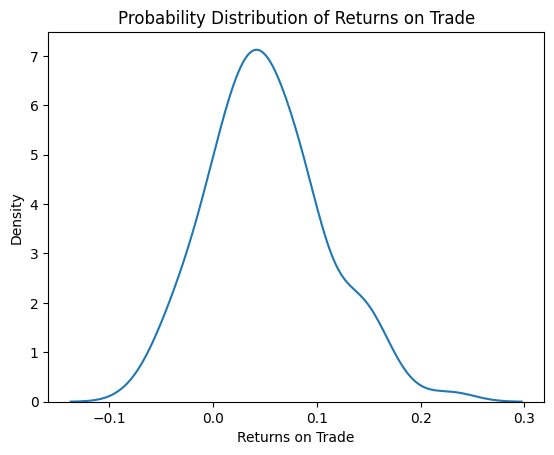

In [ ]:
import seaborn as sns

sns.kdeplot(combined_df1['indicator_returns_on_trade'].iloc[1:])
plt.xlabel('Returns on Trade')
plt.ylabel('Density')
plt.title('Probability Distribution of Returns on Trade')
plt.show()

In [ ]:
# Define the ranges for your frequency table
bins = [-0.20,-0.15,-0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.9]  # Adjust ranges as needed

# Create the frequency table using pd.cut and value_counts
frequency_table = pd.cut(combined_df1['indicator_returns_on_trade'].iloc[1:], bins=bins).value_counts().sort_index()

# Display the frequency table
print(frequency_table)

indicator_returns_on_trade
(-0.2, -0.15]     0
(-0.15, -0.1]     0
(-0.1, -0.05]     1
(-0.05, 0.0]     13
(0.0, 0.05]      38
(0.05, 0.1]      30
(0.1, 0.15]      12
(0.15, 0.2]       3
(0.2, 0.25]       1
(0.25, 0.3]       0
(0.3, 0.35]       0
(0.35, 0.4]       0
(0.4, 0.45]       0
(0.45, 0.5]       0
(0.5, 0.9]        0
Name: count, dtype: int64


In [ ]:

# Group the data into 4 groups of 50 rows each
groups = [combined_df1.iloc[i:i + 25] for i in range(0, len(combined_df1), 25)]

# Group the data into 4 groups of 50 rows each
groups = [combined_df1.iloc[i:i + 25] for i in range(0, len(combined_df1), 25)]

# Calculate annual returns for each group
# Dynamically create the years list based on the number of groups
years = [f'Year {i+1}' for i in range(len(groups))]  # Updated years list

indicator_annual_returns = []
for group in groups:
    # Calculate the cumulative return for the group's 'investment_per_date' column
    indicator_yearly_returns = (group['indicator_investment_per_date'].iloc[-1] - group['indicator_investment_per_date'].iloc[0]) / group['indicator_investment_per_date'].iloc[0]
    indicator_percentage_return = indicator_yearly_returns * 100 # Calculate percentage return
    indicator_annual_returns.append(indicator_percentage_return)

# Create a new DataFrame with year and annual returns
indicator_annual_returns_df = pd.DataFrame({'Year': years, 'Annual Return': indicator_annual_returns})

# Display the annual returns DataFrame
print(indicator_annual_returns_df)

     Year  Annual Return
0  Year 1     421.749974
1  Year 2     220.338257
2  Year 3     150.005169
3  Year 4     181.690091


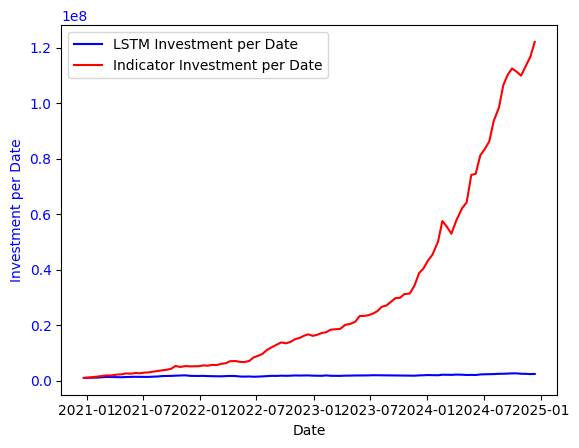

In [ ]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot 'investment_per_date' on the primary y-axis (ax1)
ax1.plot(combined_df.index, combined_df['investment_per_date'], 'b-', label='LSTM Investment per Date')
ax1.set_xlabel('Date')
ax1.set_ylabel('Investment per Date', color='b')
ax1.tick_params('y', labelcolor='b')

# Plot 'indicator_investment_per_date' on the same y-axis (ax1)
ax1.plot(combined_df1.index, combined_df1['indicator_investment_per_date'], 'r-', label='Indicator Investment per Date')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc="upper left")

# Display the plot
plt.show()

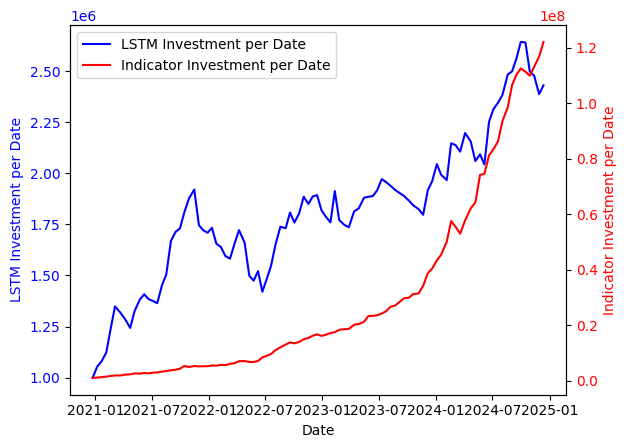

In [ ]:

# Create the plot
fig, ax1 = plt.subplots()

# Plot 'investment_per_date' on the primary y-axis (ax1)
ax1.plot(combined_df.index, combined_df['investment_per_date'], 'b-', label='LSTM Investment per Date')
ax1.set_xlabel('Date')
ax1.set_ylabel('LSTM Investment per Date', color='b')
ax1.tick_params('y', labelcolor='b')

# Create a secondary y-axis (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Plot 'indicator_investment_per_date' on the secondary y-axis (ax2)
# Changed column name to 'indicator_investment_per_date'
ax2.plot(combined_df1.index, combined_df1['indicator_investment_per_date'], 'r-', label='Indicator Investment per Date')
ax2.set_ylabel('Indicator Investment per Date', color='r')
ax2.tick_params('y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")  # Combine legends

# Display the plot
plt.show()

In [ ]:
# Merge the DataFrames on the 'Year' column
combined_annual_returns_df = pd.merge(LSTM_annual_returns_df, indicator_annual_returns_df, on='Year', suffixes=('_LSTM', '_Indicator'))

# Display the combined DataFrame
print(combined_annual_returns_df)

     Year  Annual Return_LSTM  Annual Return_Indicator
0  Year 1           72.312011               421.749974
1  Year 2           10.786526               220.338257
2  Year 3            7.761882               150.005169
3  Year 4           18.846562               181.690091


In [ ]:


# Assuming combined_annual_returns_df is already loaded

# Function to calculate the range of years and the final amount
def calculate_year_range_and_final_amount(df, initial_capital=1000000):
    years = df['Year'].tolist()
    start_years = [int(year.split(' ')[1]) for year in years]  # Extract start year from 'Year 1', 'Year 2', etc.
    end_years = [start_year + 1 for start_year in start_years]  # Calculate end year

    # Calculate final amount for each year (LSTM)
    final_amounts_lstm = [initial_capital]
    for i in range(len(df)):
        annual_return_lstm = df.loc[i, 'Annual Return_LSTM'] / 100  # Convert percentage to decimal
        final_amounts_lstm.append(final_amounts_lstm[-1] * (1 + annual_return_lstm))

    # Calculate final amount for each year (Indicator)
    final_amounts_indicator = [initial_capital]
    for i in range(len(df)):
        annual_return_indicator = df.loc[i, 'Annual Return_Indicator'] / 100  # Convert percentage to decimal
        final_amounts_indicator.append(final_amounts_indicator[-1] * (1 + annual_return_indicator))

    # Create a new DataFrame
    result_df = pd.DataFrame({
        'Year From': start_years,
        'Year To': end_years,
        'Annual Return_LSTM': df['Annual Return_LSTM'],  # Include LSTM annual return
        'Annual Return_Indicator': df['Annual Return_Indicator'],  # Include Indicator annual return
        'Final Amount_LSTM': final_amounts_lstm[1:],  # Exclude initial capital (LSTM)
        'Final Amount_Indicator': final_amounts_indicator[1:]  # Exclude initial capital (Indicator)
    })
    result_df.index = years  # Set index to 'Year 1', 'Year 2', etc.
    return result_df

# Apply the function to your DataFrame
result_df = calculate_year_range_and_final_amount(combined_annual_returns_df)

#Function to format amounts with commas

def format_amounts_with_commas(df):
    for column in ['Final Amount_LSTM', 'Final Amount_Indicator']:
        df[column] = df[column].apply(lambda x: "{:,.2f}".format(x) if not pd.isnull(x) else x)  # Format if not NaN
    return df

# Apply the function to your DataFrame
formatted_result_df = format_amounts_with_commas(result_df)

# Display the formatted result
print(formatted_result_df)

        Year From  Year To  Annual Return_LSTM  Annual Return_Indicator  \
Year 1          1        2           72.312011               421.749974   
Year 2          2        3           10.786526               220.338257   
Year 3          3        4            7.761882               150.005169   
Year 4          4        5           18.846562               181.690091   

       Final Amount_LSTM Final Amount_Indicator  
Year 1      1,723,120.11           5,217,499.74  
Year 2      1,908,984.90          16,713,647.71  
Year 3      2,057,158.06          41,784,983.21  
Year 4      2,444,861.63         117,704,157.37  


Nifty returns for the same periods

In [ ]:
# Define the ticker symbol for Nifty index
nifty_symbol = "^NSEI"

# Define the start and end dates
start_date = "2020-12-23"
end_date = "2024-12-31"

# Download the data
nifty_data = yf.download(nifty_symbol, start=start_date, end=end_date)

# Display the data
print(nifty_data)

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2020-12-23  13601.099609  13619.450195  13432.200195  13473.500000  458700
2020-12-24  13749.250000  13771.750000  13626.900391  13672.150391  471400
2020-12-28  13873.200195  13885.299805  13811.549805  13815.150391  403600
2020-12-29  13932.599609  13967.599609  13859.900391  13910.349609  439600
2020-12-30  13981.950195  13997.000000  13864.950195  13980.900391  380700
...                  ...           ...           ...           ...     ...
2024-12-23  23753.449219  23869.550781  23647.199219  23738.199219  189800
2024-12-24  23727.650391  23867.650391  23685.150391  23769.099609  177700
2024-12-26  23750.199219  23854.500000  23653.599609  23775.800781  177700
2024-12-27  23813.400391  23938.84960

In [ ]:
list(nifty_data.columns)

[('Close', '^NSEI'),
 ('High', '^NSEI'),
 ('Low', '^NSEI'),
 ('Open', '^NSEI'),
 ('Volume', '^NSEI')]

In [ ]:
yearly_nifty=nifty_data['Close', '^NSEI']

In [ ]:

# Group the data into 4 groups of 250 rows each
groups = [yearly_nifty.iloc[i:i + 250] for i in range(0, len(yearly_nifty), 250)]

# Calculate annual returns for each group
years = ['Year 1', 'Year 2', 'Year 3', 'Year 4']  # Adjust years as needed
nifty_annual_returns = []

for group in groups:
    if len(group) >= 2:  # Ensure there are at least two rows for calculation
        first_price = group.iloc[0] # Changed groupyearly_nifty to yearly_nifty
        last_price = group.iloc[-1] # Changed groupyearly_nifty to yearly_nifty
        annual_return = ((last_price - first_price) / first_price) * 100
        nifty_annual_returns.append(annual_return)
    else:
        nifty_annual_returns.append(float('nan'))  # Handle groups with less than 2 rows

# Create a new DataFrame with year and annual returns
nifty_annual_returns_df = pd.DataFrame({'Year': years, 'Annual Return': nifty_annual_returns})

# Display the annual returns DataFrame
print(nifty_annual_returns_df)

     Year  Annual Return
0  Year 1      25.624034
1  Year 2       5.160083
2  Year 3      18.285689
3  Year 4       9.170957


In [ ]:
# Merge LSTM_annual_returns_df and indicator_annual_returns_df
combined_annual_returns_df = pd.merge(LSTM_annual_returns_df, indicator_annual_returns_df, on='Year', suffixes=('_LSTM', '_Indicator'))

# Merge the result with nifty_annual_returns_df
combined_annual_returns_df = pd.merge(combined_annual_returns_df, nifty_annual_returns_df, on='Year', suffixes=('', '_Nifty'))
# Rename the 'Annual Return' column to 'Annual Return_Nifty'
combined_annual_returns_df = combined_annual_returns_df.rename(columns={'Annual Return': 'Annual Return_Nifty'})

# Display the combined DataFrame
print(combined_annual_returns_df)

     Year  Annual Return_LSTM  Annual Return_Indicator  Annual Return_Nifty
0  Year 1           72.312011               421.749974            25.624034
1  Year 2           10.786526               220.338257             5.160083
2  Year 3            7.761882               150.005169            18.285689
3  Year 4           18.846562               181.690091             9.170957


In [ ]:
# Function to calculate metrics
def calculate_metrics(returns_series):
  """Calculates performance metrics for a given returns series."""
  winning_percentage = (returns_series > 0).sum() / len(returns_series)
  max_drawdown = calculate_max_drawdown(returns_series)
  sharpe_ratio = returns_series.mean() / returns_series.std()
  avg_daily_return = returns_series.mean()  # Calculate average daily return
  total_profit = returns_series[returns_series > 0].sum()
  total_loss = abs(returns_series[returns_series < 0].sum())
  profit_factor = total_profit / total_loss if total_loss != 0 else np.inf
  return {
      "Winning Percentage": winning_percentage,
      "Max Drawdown": max_drawdown,
      "Sharpe Ratio": sharpe_ratio,
      "Average Trade Return": avg_daily_return,  # Use avg_daily_return instead of avg_trade_return
      "Profit Factor": profit_factor,
  }

# Function to calculate max drawdown (same as before)
def calculate_max_drawdown(returns_series):
  """Calculates the maximum drawdown of a returns series."""
  cumulative_returns = (returns_series + 1).cumprod()
  peak = cumulative_returns.cummax()
  drawdown = (cumulative_returns - peak) / peak
  max_drawdown = drawdown.min()
  return max_drawdown

#Calculate metrics for LSTM strategy
lstm_metrics = calculate_metrics(combined_df['returns_on_trade'][1:])

# Calculate metrics for Indicator-based strategy
indicator_metrics = calculate_metrics(combined_df1['indicator_returns_on_trade'][1:])

# Create a DataFrame for comparison (modified)
metrics_df = pd.DataFrame([lstm_metrics, indicator_metrics], index=['LSTM Strategy', 'Indicator-Based Strategy'])



# Format the metrics
metrics_df["Winning Percentage"] = metrics_df["Winning Percentage"].map("{:.2%}".format)
metrics_df["Max Drawdown"] = metrics_df["Max Drawdown"].map("{:.2%}".format)
metrics_df["Sharpe Ratio"] = metrics_df["Sharpe Ratio"].map("{:.2f}".format)
metrics_df["Average Trade Return"] = metrics_df["Average Trade Return"].map("{:.2%}".format)
metrics_df["Profit Factor"] = metrics_df["Profit Factor"].map("{:.2f}".format)

# Display the comparison table
print(metrics_df)


                         Winning Percentage Max Drawdown Sharpe Ratio  \
LSTM Strategy                        53.06%      -26.03%         0.25   
Indicator-Based Strategy             85.71%       -7.93%         0.92   

                         Average Trade Return Profit Factor  
LSTM Strategy                           0.99%          1.90  
Indicator-Based Strategy                5.17%         12.95  
